In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
import numpy as np
import pandas as pd 

In [4]:
import sys
sys.path.append('../../../')

In [5]:
import matplotlib.pyplot as plt 

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [7]:
from src.utils.dates import get_nyse_business_dates

In [8]:
from research.metrics import get_features_responses_correlation
from research.plots import plot_bin_summary_of_xy

In [9]:
from src.settings import Settings

In [10]:
from src.utils.io.read import PreprocessedDataReader

In [11]:
from src.preprocessing.base import FutureTicker

In [12]:
pdr = PreprocessedDataReader(Settings.historical.paths.PREPROCESSED_DATA_PATH)                    

In [13]:
dataset = pdr.read_dataset(ticker=FutureTicker.WTI)

In [14]:
dataset.shape

(813, 81)

In [15]:
dataset.tail(2)

,tradeDate,Name,Commercial_NetPosition,CommercialLongPosition,CommercialShortPosition,ManagedMoney_NetPosition,ManagedMoney_LongPosition,ManagedMoney_ShortPosition,Commercial_NetPosition_change,prior_report_Commercial_NetPosition_change,...,prior_cumulative_5D_F2_Volume_change,next_prior_cumulative_5D_F2_Volume_change,prior_cumulative_5D_F1MinusF2_Volume_change,next_prior_cumulative_5D_F1MinusF2_Volume_change,F1_RolledPrice_change,next_F1_RolledPrice_change,F2_RolledPrice_change,next_F2_RolledPrice_change,F3_RolledPrice_change,next_F3_RolledPrice_change
811,2025-07-22,CL,355309.0,1179861.0,824552.0,208836.0,406472.0,197636.0,-13379.0,31871.0,...,335852.0,-652406.0,-916765.0,1366289.0,0.08,3.9,0.11,3.82,0.18,3.64
812,2025-07-29,CL,362436.0,1172427.0,809991.0,207342.0,411275.0,203933.0,7127.0,-13379.0,...,-652406.0,NaN,1366289.0,NaN,3.90,NaN,3.82,NaN,3.64,NaN


In [16]:
dataset.columns.tolist()

['tradeDate',
 'Name',
 'Commercial_NetPosition',
 'CommercialLongPosition',
 'CommercialShortPosition',
 'ManagedMoney_NetPosition',
 'ManagedMoney_LongPosition',
 'ManagedMoney_ShortPosition',
 'Commercial_NetPosition_change',
 'prior_report_Commercial_NetPosition_change',
 'forward_report_Commercial_NetPosition_change',
 'CommercialLongPosition_change',
 'prior_report_CommercialLongPosition_change',
 'forward_report_CommercialLongPosition_change',
 'CommercialShortPosition_change',
 'prior_report_CommercialShortPosition_change',
 'forward_report_CommercialShortPosition_change',
 'ManagedMoney_NetPosition_change',
 'prior_report_ManagedMoney_NetPosition_change',
 'forward_report_ManagedMoney_NetPosition_change',
 'ManagedMoney_LongPosition_change',
 'prior_report_ManagedMoney_LongPosition_change',
 'forward_report_ManagedMoney_LongPosition_change',
 'ManagedMoney_ShortPosition_change',
 'prior_report_ManagedMoney_ShortPosition_change',
 'forward_report_ManagedMoney_ShortPosition_chan

In [17]:
dataset['Commercial_NetPosition'].describe()

count       813.000000
mean     -11247.533825
std      156021.927084
min     -315658.000000
25%     -146916.000000
50%       13553.000000
75%       95631.000000
max      368688.000000
Name: Commercial_NetPosition, dtype: float64

In [18]:
dataset['ManagedMoney_NetPosition'].describe()

count       813.000000
mean     405093.035670
std      162420.952528
min      100633.000000
25%      273760.000000
50%      366026.000000
75%      518079.000000
max      848584.000000
Name: ManagedMoney_NetPosition, dtype: float64

In [19]:
np.sum(dataset['ManagedMoney_LongPosition'] <= dataset['ManagedMoney_ShortPosition'])

np.int64(0)

In [20]:
dataset['tradeDate'] = pd.to_datetime(dataset['tradeDate']).dt.date

In [21]:
dataset.sort_values(by = 'tradeDate', ascending = True, inplace=True)

In [22]:
dataset.columns.tolist()

['tradeDate',
 'Name',
 'Commercial_NetPosition',
 'CommercialLongPosition',
 'CommercialShortPosition',
 'ManagedMoney_NetPosition',
 'ManagedMoney_LongPosition',
 'ManagedMoney_ShortPosition',
 'Commercial_NetPosition_change',
 'prior_report_Commercial_NetPosition_change',
 'forward_report_Commercial_NetPosition_change',
 'CommercialLongPosition_change',
 'prior_report_CommercialLongPosition_change',
 'forward_report_CommercialLongPosition_change',
 'CommercialShortPosition_change',
 'prior_report_CommercialShortPosition_change',
 'forward_report_CommercialShortPosition_change',
 'ManagedMoney_NetPosition_change',
 'prior_report_ManagedMoney_NetPosition_change',
 'forward_report_ManagedMoney_NetPosition_change',
 'ManagedMoney_LongPosition_change',
 'prior_report_ManagedMoney_LongPosition_change',
 'forward_report_ManagedMoney_LongPosition_change',
 'ManagedMoney_ShortPosition_change',
 'prior_report_ManagedMoney_ShortPosition_change',
 'forward_report_ManagedMoney_ShortPosition_chan

In [23]:
from research.model_selection.CombinatorialPurgedCV import CombinatorialPurgedCV
from research.model_selection.CombinatorialPurgedCV import cpcv_predict



In [24]:

from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor


In [25]:
?CombinatorialPurgedCV

Init signature: CombinatorialPurgedCV(n_partitions: int, k: int, purge_amount: int)
Docstring:     
Combinatorial Purged Cross-Validatpr with Purging

This class identifies training and testing indicies that split the data into train/test sets. It also implements purging to avoid lookahead bias.
Init docstring:
Args:
:param n_partitions: the total number of partitions
:param k: the number of partitions to include in the test set
:param purge_amount: the number of indices to be purged between train/test sets
File:           ~/Documents/Projects/omroot_repos/COTAME/research/model_selection/CombinatorialPurgedCV.py
Type:           type
Subclasses:     

In [26]:
response_names =  ['ManagedMoney_NetPosition_to_openinterest_change',
                'ManagedMoney_LongPosition_to_openinterest_change',
                'ManagedMoney_ShortPosition_to_openinterest_change'] 



In [27]:
cv = CombinatorialPurgedCV(n_partitions=10,
                           k=2,
                           purge_amount=10)

In [28]:
import json

In [29]:
with open("wti_cot_mm_nowcast_selected_features_by_response.json", "r") as f:
    selected_features_by_response = json.load(f)

In [30]:
selected_features_by_response

{'ManagedMoney_NetPosition_change': ['prior_cumulative_5D_F1MinusF2_Volume_change',
  'prior_5D_F1_OI_change',
  'prior_report_ManagedMoney_NetPosition_change',
  'prior_report_ManagedMoney_LongPosition_to_openinterest_change',
  'F3_RolledPrice_change'],
 'ManagedMoney_LongPosition_change': ['prior_report_ManagedMoney_ShortPosition_to_openinterest_change',
  'prior_5D_F1_OI_change',
  'prior_5D_AGG_OI_change',
  'F2_RolledPrice_change'],
 'ManagedMoney_ShortPosition_change': ['prior_cumulative_5D_F2_Volume_change',
  'prior_5D_F1_OI_change',
  'prior_5D_AGG_OI_change',
  'F1_RolledPrice_change'],
 'ManagedMoney_NetPosition_to_openinterest_change': ['prior_report_ManagedMoney_NetPosition_change',
  'prior_report_ManagedMoney_LongPosition_change',
  'prior_5D_F1_OI_change',
  'prior_5D_AGG_OI_change',
  'F1_RolledPrice_change'],
 'ManagedMoney_LongPosition_to_openinterest_change': ['prior_report_ManagedMoney_ShortPosition_to_openinterest_change',
  'F3_RolledPrice_change',
  'prior_5D_F

In [31]:
from src.preprocessing.base import Winsorizer

In [32]:
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [33]:
from sklearn.linear_model import SGDRegressor, Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor

estimators_  = {
    # Elastic-net via SGD (fast, online)
    "enet": SGDRegressor(
        penalty="elasticnet",
        alpha=1e-4,
        l1_ratio=0.15,
        loss="squared_error",   # or "huber" for robustness
        max_iter=1000,
        tol=1e-3,
        random_state=42
    ),
    # Classic L1 / OLS / L2
    "lasso": Lasso(alpha=1.0, random_state=42),
    "ols": LinearRegression(),
    "ridge": Ridge(alpha=1.0, random_state=42),

    # Tree-based regressors
    "rf": RandomForestRegressor(n_estimators=250, max_depth=10, random_state=42),
    "extra": ExtraTreesRegressor(n_estimators=250, max_depth=10, random_state=42),
    "hgbm": HistGradientBoostingRegressor(max_iter=150, learning_rate=0.001, random_state=42),
}


In [34]:
from __future__ import annotations
import numpy as np
import optuna
from optuna import pruners
from research.model_selection.evaluation import find_best_model

responses_best_model = {}
responses_best_params = {}
responses_study = {}
responses_best_per_model = {}

for (response_name, feature_names) in selected_features_by_response.items():
    best_model, best_params, study, best_per_model = find_best_model(
                        Xy=dataset,
                        feature_names=feature_names,
                        response_name=response_name,
                        cv=cv,
                        n_trials=80,         # bump this as you like
                        n_jobs_cpcv=10,
                        seed=42
                    )
    responses_best_model[response_name]=best_model
    responses_best_params[response_name]=best_params
    responses_study[response_name]=study
    responses_best_per_model[response_name]=best_per_model
    
    print("Overall Best Params:", best_params)
    print("\nBest Per Model:")
    for model, info in best_per_model.items():
        print(f"{model}: score={info['score']:.4f}, params={info['params']}")

[I 2025-08-20 13:42:38,718] A new study created in memory with name: no-name-d59d0134-5bff-4dc9-b79b-9563821b0d4f
Best trial: 0. Best value: 0.469561:   1%|       | 1/80 [00:01<01:50,  1.40s/it]

[I 2025-08-20 13:42:40,122] Trial 0 finished with value: 0.46956053714992274 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.46956053714992274.
[I 2025-08-20 13:42:40,166] Trial 1 finished with value: 0.4695603929771119 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 0 with value: 0.46956053714992274.


Best trial: 2. Best value: 0.54913:   4%|▎       | 3/80 [00:05<02:18,  1.80s/it]

[I 2025-08-20 13:42:43,998] Trial 2 finished with value: 0.5491297043988389 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.5491297043988389.


Best trial: 2. Best value: 0.54913:   9%|▋       | 7/80 [00:05<00:39,  1.85it/s]

[I 2025-08-20 13:42:44,293] Trial 3 finished with value: 0.5082219772577654 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.5491297043988389.
[I 2025-08-20 13:42:44,336] Trial 4 finished with value: 0.4695613604516074 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.5491297043988389.
[I 2025-08-20 13:42:44,379] Trial 5 finished with value: 0.46956039207307754 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.5491297043988389.
[I 2025-08-20 13:42:44,422] Trial 6 finished with value: 0.44394798784112627 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.5491297043988389.
[I 2025-08-20 13:42:44,464] Trial 7 finished with value: 0.46956039207307754 and pa

Best trial: 2. Best value: 0.54913:  11%|▉       | 9/80 [00:06<00:29,  2.40it/s]

[I 2025-08-20 13:42:44,819] Trial 8 finished with value: 0.5273723990093327 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.5491297043988389.
[I 2025-08-20 13:42:44,849] Trial 9 finished with value: 0.46956039207307754 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.5491297043988389.


Best trial: 10. Best value: 0.549134:  14%|▋    | 11/80 [00:09<01:01,  1.12it/s]

[I 2025-08-20 13:42:48,465] Trial 10 finished with value: 0.5491336323540771 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.5491336323540771.


Best trial: 10. Best value: 0.549134:  15%|▊    | 12/80 [00:13<01:38,  1.45s/it]

[I 2025-08-20 13:42:52,180] Trial 11 finished with value: 0.5491336323540771 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.5491336323540771.


Best trial: 10. Best value: 0.549134:  16%|▊    | 13/80 [00:17<02:10,  1.95s/it]

[I 2025-08-20 13:42:55,907] Trial 12 finished with value: 0.5491336323540771 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.5491336323540771.


Best trial: 10. Best value: 0.549134:  18%|▉    | 14/80 [00:19<02:07,  1.93s/it]

[I 2025-08-20 13:42:57,802] Trial 13 finished with value: 0.5195775978343266 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.5491336323540771.


Best trial: 14. Best value: 0.550485:  19%|▉    | 15/80 [00:26<03:31,  3.25s/it]

[I 2025-08-20 13:43:04,912] Trial 14 finished with value: 0.5504848745668076 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5504848745668076.


Best trial: 14. Best value: 0.550485:  20%|█    | 16/80 [00:33<04:42,  4.42s/it]

[I 2025-08-20 13:43:12,562] Trial 15 finished with value: 0.5504848745668076 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5504848745668076.


Best trial: 14. Best value: 0.550485:  24%|█▏   | 19/80 [00:41<03:00,  2.96s/it]

[I 2025-08-20 13:43:19,989] Trial 16 finished with value: 0.5504848745668076 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5504848745668076.
[I 2025-08-20 13:43:20,051] Trial 17 finished with value: 0.46986889957123035 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 14 with value: 0.5504848745668076.
[I 2025-08-20 13:43:20,097] Trial 18 finished with value: 0.46956235725160306 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 14 with value: 0.5504848745668076.


Best trial: 14. Best value: 0.550485:  25%|█▎   | 20/80 [00:45<03:16,  3.27s/it]

[I 2025-08-20 13:43:24,352] Trial 19 finished with value: 0.5242207461300966 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.5504848745668076.


Best trial: 14. Best value: 0.550485:  26%|█▎   | 21/80 [00:52<04:01,  4.09s/it]

[I 2025-08-20 13:43:30,857] Trial 20 finished with value: 0.5501928881549316 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5504848745668076.


Best trial: 14. Best value: 0.550485:  28%|█▍   | 22/80 [00:59<04:49,  4.99s/it]

[I 2025-08-20 13:43:38,316] Trial 21 finished with value: 0.5504848745668076 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5504848745668076.


Best trial: 14. Best value: 0.550485:  29%|█▍   | 23/80 [01:05<05:02,  5.30s/it]

[I 2025-08-20 13:43:44,432] Trial 22 finished with value: 0.5501928881549316 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5504848745668076.


Best trial: 14. Best value: 0.550485:  30%|█▌   | 24/80 [01:06<03:53,  4.17s/it]

[I 2025-08-20 13:43:45,713] Trial 23 finished with value: 0.5503904144646108 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 16, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5504848745668076.


Best trial: 14. Best value: 0.550485:  31%|█▌   | 25/80 [01:13<04:21,  4.76s/it]

[I 2025-08-20 13:43:51,953] Trial 24 finished with value: 0.5499094019298094 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 14 with value: 0.5504848745668076.


Best trial: 14. Best value: 0.550485:  32%|█▋   | 26/80 [01:20<04:58,  5.53s/it]

[I 2025-08-20 13:43:59,360] Trial 25 finished with value: 0.5460163488382522 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.5504848745668076.


Best trial: 14. Best value: 0.550485:  34%|█▋   | 27/80 [01:28<05:30,  6.23s/it]/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximu

[I 2025-08-20 13:44:07,254] Trial 26 finished with value: 0.5313850363172559 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 14 with value: 0.5504848745668076.


/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter t

[I 2025-08-20 13:44:07,862] Trial 27 finished with value: 0.4668698856090108 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 14 with value: 0.5504848745668076.
[I 2025-08-20 13:44:07,907] Trial 28 finished with value: 0.47140199260264676 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 14 with value: 0.5504848745668076.
[I 2025-08-20 13:44:07,949] Trial 29 finished with value: 0.46956039230182933 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 14 with value: 0.5504848745668076.


Best trial: 14. Best value: 0.550485:  39%|█▉   | 31/80 [01:32<02:13,  2.73s/it]

[I 2025-08-20 13:44:11,722] Trial 30 finished with value: 0.5208884989047643 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 25, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 14 with value: 0.5504848745668076.


Best trial: 14. Best value: 0.550485:  40%|██   | 32/80 [01:40<02:54,  3.64s/it]

[I 2025-08-20 13:44:18,759] Trial 31 finished with value: 0.5504848745668076 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5504848745668076.


Best trial: 14. Best value: 0.550485:  41%|██   | 33/80 [01:47<03:36,  4.60s/it]

[I 2025-08-20 13:44:26,576] Trial 32 finished with value: 0.5500677472992532 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 14 with value: 0.5504848745668076.


Best trial: 14. Best value: 0.550485:  42%|██▏  | 34/80 [01:53<03:49,  4.98s/it]

[I 2025-08-20 13:44:32,719] Trial 33 finished with value: 0.5499094019298094 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 14 with value: 0.5504848745668076.


Best trial: 14. Best value: 0.550485:  44%|██▏  | 35/80 [01:55<03:02,  4.06s/it]

[I 2025-08-20 13:44:34,168] Trial 34 finished with value: 0.5475880921392099 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 14 with value: 0.5504848745668076.


Best trial: 14. Best value: 0.550485:  46%|██▎  | 37/80 [02:02<03:32,  4.93s/it]

[I 2025-08-20 13:44:41,438] Trial 35 finished with value: 0.5504848745668076 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5504848745668076.
[I 2025-08-20 13:44:41,471] Trial 36 finished with value: 0.47048473584830147 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 14 with value: 0.5504848745668076.
[I 2025-08-20 13:44:41,501] Trial 37 finished with value: 0.46956039207376077 and parameters: {'model': 'lasso', 'alpha': 1.261122987665929e-06}. Best is trial 14 with value: 0.5504848745668076.


Best trial: 14. Best value: 0.550485:  49%|██▍  | 39/80 [02:08<02:13,  3.25s/it]

[I 2025-08-20 13:44:46,882] Trial 38 finished with value: 0.550034367665241 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 26, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 14 with value: 0.5504848745668076.


Best trial: 14. Best value: 0.550485:  50%|██▌  | 40/80 [02:11<02:09,  3.24s/it]

[I 2025-08-20 13:44:50,051] Trial 39 finished with value: 0.5316853884826307 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 13, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 14 with value: 0.5504848745668076.
[I 2025-08-20 13:44:50,097] Trial 40 finished with value: 0.46956039207307754 and parameters: {'model': 'ols'}. Best is trial 14 with value: 0.5504848745668076.


Best trial: 14. Best value: 0.550485:  52%|██▋  | 42/80 [02:18<02:08,  3.37s/it]

[I 2025-08-20 13:44:57,252] Trial 41 finished with value: 0.5504848745668076 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5504848745668076.


Best trial: 14. Best value: 0.550485:  54%|██▋  | 43/80 [02:25<02:33,  4.16s/it]

[I 2025-08-20 13:45:04,396] Trial 42 finished with value: 0.5504848745668076 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5504848745668076.


Best trial: 14. Best value: 0.550485:  55%|██▊  | 44/80 [02:32<02:54,  4.84s/it]

[I 2025-08-20 13:45:11,553] Trial 43 finished with value: 0.5500677472992532 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 23, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 14 with value: 0.5504848745668076.


Best trial: 14. Best value: 0.550485:  56%|██▊  | 45/80 [02:38<02:59,  5.14s/it]

[I 2025-08-20 13:45:17,606] Trial 44 finished with value: 0.5501928881549317 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5504848745668076.


Best trial: 14. Best value: 0.550485:  61%|███  | 49/80 [02:46<01:24,  2.72s/it]

[I 2025-08-20 13:45:24,937] Trial 45 finished with value: 0.5500677472992531 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 23, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.5504848745668076.
[I 2025-08-20 13:45:24,985] Trial 46 finished with value: 0.4698689002236618 and parameters: {'model': 'enet', 'alpha': 1.0191349226350149e-05, 'l1_ratio': 0.9914173791995448, 'loss': 'squared_error'}. Best is trial 14 with value: 0.5504848745668076.
[I 2025-08-20 13:45:25,017] Trial 47 finished with value: 0.4698203889114601 and parameters: {'model': 'ridge', 'alpha': 13.831088291814737}. Best is trial 14 with value: 0.5504848745668076.
[I 2025-08-20 13:45:25,049] Trial 48 finished with value: 0.46956039207307754 and parameters: {'model': 'ols'}. Best is trial 14 with value: 0.5504848745668076.


Best trial: 14. Best value: 0.550485:  62%|███▏ | 50/80 [02:51<01:36,  3.23s/it]

[I 2025-08-20 13:45:30,322] Trial 49 finished with value: 0.5478629431158469 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 18, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 14 with value: 0.5504848745668076.


Best trial: 14. Best value: 0.550485:  64%|███▏ | 51/80 [02:55<01:36,  3.32s/it]

[I 2025-08-20 13:45:33,948] Trial 50 finished with value: 0.5165729588506627 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 27, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5504848745668076.


Best trial: 14. Best value: 0.550485:  65%|███▎ | 52/80 [03:02<01:59,  4.27s/it]

[I 2025-08-20 13:45:41,204] Trial 51 finished with value: 0.5504848745668076 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5504848745668076.


Best trial: 14. Best value: 0.550485:  66%|███▎ | 53/80 [03:09<02:16,  5.07s/it]

[I 2025-08-20 13:45:48,576] Trial 52 finished with value: 0.5500703269965536 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 15, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 14 with value: 0.5504848745668076.


Best trial: 14. Best value: 0.550485:  68%|███▍ | 54/80 [03:17<02:26,  5.65s/it]

[I 2025-08-20 13:45:55,834] Trial 53 finished with value: 0.5504848745668076 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5504848745668076.


Best trial: 54. Best value: 0.550556:  69%|███▍ | 55/80 [03:18<01:51,  4.45s/it]

[I 2025-08-20 13:45:57,158] Trial 54 finished with value: 0.5505555333903354 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 21, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 54 with value: 0.5505555333903354.


Best trial: 55. Best value: 0.550556:  70%|███▌ | 56/80 [03:19<01:26,  3.60s/it]

[I 2025-08-20 13:45:58,610] Trial 55 finished with value: 0.5505555333903356 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 55 with value: 0.5505555333903356.


Best trial: 55. Best value: 0.550556:  71%|███▌ | 57/80 [03:21<01:12,  3.14s/it]

[I 2025-08-20 13:46:00,610] Trial 56 finished with value: 0.4647202989926714 and parameters: {'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 15, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}. Best is trial 55 with value: 0.5505555333903356.


Best trial: 55. Best value: 0.550556:  72%|███▋ | 58/80 [03:23<00:58,  2.66s/it]

[I 2025-08-20 13:46:02,085] Trial 57 finished with value: 0.5476140550644981 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 21, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 55 with value: 0.5505555333903356.
[I 2025-08-20 13:46:02,131] Trial 58 finished with value: 0.4695603933029612 and parameters: {'model': 'lasso', 'alpha': 0.002785993459385819}. Best is trial 55 with value: 0.5505555333903356.


Best trial: 55. Best value: 0.550556:  76%|███▊ | 61/80 [03:26<00:30,  1.58s/it]

[I 2025-08-20 13:46:04,686] Trial 59 finished with value: 0.5489993736263608 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 24, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 55 with value: 0.5505555333903356.
[I 2025-08-20 13:46:04,852] Trial 60 finished with value: 0.37838447707362727 and parameters: {'model': 'enet', 'alpha': 8.401276915097045e-06, 'l1_ratio': 0.502306324418736, 'loss': 'huber', 'epsilon': 0.13787813405129054}. Best is trial 55 with value: 0.5505555333903356.


Best trial: 55. Best value: 0.550556:  78%|███▉ | 62/80 [03:28<00:33,  1.84s/it]

[I 2025-08-20 13:46:07,426] Trial 61 finished with value: 0.5501280559222175 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 22, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 55 with value: 0.5505555333903356.


Best trial: 55. Best value: 0.550556:  79%|███▉ | 63/80 [03:30<00:29,  1.72s/it]

[I 2025-08-20 13:46:08,844] Trial 62 finished with value: 0.5493513318886171 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 21, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 55 with value: 0.5505555333903356.


Best trial: 55. Best value: 0.550556:  80%|████ | 64/80 [03:32<00:31,  1.96s/it]

[I 2025-08-20 13:46:11,415] Trial 63 finished with value: 0.5501280559222174 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 23, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 55 with value: 0.5505555333903356.


Best trial: 55. Best value: 0.550556:  81%|████ | 65/80 [03:33<00:26,  1.76s/it]

[I 2025-08-20 13:46:12,686] Trial 64 finished with value: 0.5503904144646108 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 26, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 55 with value: 0.5505555333903356.


Best trial: 55. Best value: 0.550556:  82%|████▏| 66/80 [03:36<00:29,  2.11s/it]

[I 2025-08-20 13:46:15,647] Trial 65 finished with value: 0.5413043570957822 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 20, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.5505555333903356.


Best trial: 55. Best value: 0.550556:  84%|████▏| 67/80 [03:43<00:43,  3.31s/it]

[I 2025-08-20 13:46:21,855] Trial 66 finished with value: 0.5491187056015755 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 55 with value: 0.5505555333903356.


Best trial: 55. Best value: 0.550556:  86%|████▎| 69/80 [03:43<00:27,  2.54s/it]

[I 2025-08-20 13:46:22,550] Trial 67 finished with value: 0.5117683665829448 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 55 with value: 0.5505555333903356.
[I 2025-08-20 13:46:22,592] Trial 68 finished with value: 0.46956039207307754 and parameters: {'model': 'ols'}. Best is trial 55 with value: 0.5505555333903356.
[I 2025-08-20 13:46:22,624] Trial 69 finished with value: 0.46957653091398743 and parameters: {'model': 'ridge', 'alpha': 0.802033864121421}. Best is trial 55 with value: 0.5505555333903356.


Best trial: 55. Best value: 0.550556:  89%|████▍| 71/80 [03:49<00:18,  2.09s/it]

[I 2025-08-20 13:46:27,779] Trial 70 finished with value: 0.5500343676652409 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 25, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 55 with value: 0.5505555333903356.


Best trial: 55. Best value: 0.550556:  90%|████▌| 72/80 [03:56<00:25,  3.17s/it]

[I 2025-08-20 13:46:35,016] Trial 71 finished with value: 0.5504848745668076 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 55 with value: 0.5505555333903356.


Best trial: 55. Best value: 0.550556:  91%|████▌| 73/80 [04:03<00:29,  4.14s/it]

[I 2025-08-20 13:46:42,390] Trial 72 finished with value: 0.5504848745668076 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 55 with value: 0.5505555333903356.


Best trial: 55. Best value: 0.550556:  92%|████▋| 74/80 [04:09<00:27,  4.64s/it]

[I 2025-08-20 13:46:48,525] Trial 73 finished with value: 0.5501928881549317 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 18, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 55 with value: 0.5505555333903356.


Best trial: 55. Best value: 0.550556:  94%|████▋| 75/80 [04:17<00:26,  5.33s/it]

[I 2025-08-20 13:46:55,798] Trial 74 finished with value: 0.5504848745668076 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 55 with value: 0.5505555333903356.


Best trial: 55. Best value: 0.550556:  95%|████▊| 76/80 [04:24<00:23,  5.90s/it]

[I 2025-08-20 13:47:03,219] Trial 75 finished with value: 0.5500677472992531 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 23, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.5505555333903356.
[I 2025-08-20 13:47:03,265] Trial 76 finished with value: 0.4695603925997321 and parameters: {'model': 'lasso', 'alpha': 0.000995487297040081}. Best is trial 55 with value: 0.5505555333903356.


Best trial: 55. Best value: 0.550556:  98%|████▉| 78/80 [04:30<00:09,  4.67s/it]

[I 2025-08-20 13:47:09,404] Trial 77 finished with value: 0.5501928881549316 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 55 with value: 0.5505555333903356.


Best trial: 55. Best value: 0.550556:  99%|████▉| 79/80 [04:32<00:03,  3.95s/it]

[I 2025-08-20 13:47:11,044] Trial 78 finished with value: 0.5250479957490657 and parameters: {'model': 'hgbm', 'learning_rate': 0.007807986931204357, 'max_depth': 7, 'max_iter': 500, 'l2_regularization': 0.9669109423262804, 'max_leaf_nodes': 191}. Best is trial 55 with value: 0.5505555333903356.


Best trial: 55. Best value: 0.550556: 100%|█████| 80/80 [04:39<00:00,  3.50s/it]
[I 2025-08-20 13:47:18,427] A new study created in memory with name: no-name-38373318-c669-4f62-bdf7-50dd96e37add


[I 2025-08-20 13:47:18,421] Trial 79 finished with value: 0.5500677472992531 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 55 with value: 0.5505555333903356.
Overall Best Params: {'model': 'rf', 'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 9, 'max_features': 'log2'}

Best Per Model:
lasso: score=0.4696, params={'model': 'lasso', 'alpha': 1.261122987665929e-06}
ridge: score=0.4696, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
rf: score=0.5314, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 1, 'max_features': 'log2'}
hgbm: score=0.4647, params={'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 15, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}
ols: score=0.4696, params={'model': 'ols'}
enet: score=0.3784, params={'model': 'enet', 'alpha': 8.401276915097045e-06, 'l1_ratio': 0.502306324418736, 

Best trial: 0. Best value: 0.388705:   1%|       | 1/80 [00:00<00:05, 13.96it/s]

[I 2025-08-20 13:47:18,469] Trial 0 finished with value: 0.3887046216870914 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.3887046216870914.
[I 2025-08-20 13:47:18,499] Trial 1 finished with value: 0.38870426224847276 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 0 with value: 0.3887046216870914.


Best trial: 2. Best value: 0.432189:   4%|▎      | 3/80 [00:03<01:38,  1.28s/it]

[I 2025-08-20 13:47:22,256] Trial 2 finished with value: 0.432189095977036 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.432189095977036.


Best trial: 2. Best value: 0.432189:  10%|▋      | 8/80 [00:04<00:25,  2.83it/s]

[I 2025-08-20 13:47:22,521] Trial 3 finished with value: 0.38316569028305675 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.432189095977036.
[I 2025-08-20 13:47:22,551] Trial 4 finished with value: 0.3887040569891918 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.432189095977036.
[I 2025-08-20 13:47:22,580] Trial 5 finished with value: 0.3887042624402227 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.432189095977036.
[I 2025-08-20 13:47:22,609] Trial 6 finished with value: 0.3254964015961131 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.432189095977036.
[I 2025-08-20 13:47:22,638] Trial 7 finished with value: 0.3887042624402227 and paramete

Best trial: 2. Best value: 0.432189:  12%|▊     | 10/80 [00:04<00:20,  3.38it/s]

[I 2025-08-20 13:47:22,951] Trial 8 finished with value: 0.4042739650970187 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.432189095977036.
[I 2025-08-20 13:47:22,983] Trial 9 finished with value: 0.3887042624402227 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.432189095977036.


Best trial: 2. Best value: 0.432189:  12%|▊     | 10/80 [00:08<00:20,  3.38it/s]

[I 2025-08-20 13:47:26,700] Trial 10 finished with value: 0.43218850556071686 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.432189095977036.


Best trial: 2. Best value: 0.432189:  15%|▉     | 12/80 [00:12<01:33,  1.38s/it]

[I 2025-08-20 13:47:30,532] Trial 11 finished with value: 0.43218850556071686 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.432189095977036.


Best trial: 2. Best value: 0.432189:  16%|▉     | 13/80 [00:15<02:01,  1.81s/it]

[I 2025-08-20 13:47:34,306] Trial 12 finished with value: 0.43218850556071686 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.432189095977036.


Best trial: 2. Best value: 0.432189:  18%|█     | 14/80 [00:17<02:01,  1.84s/it]

[I 2025-08-20 13:47:36,223] Trial 13 finished with value: 0.4273030499143712 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.432189095977036.


Best trial: 14. Best value: 0.434565:  19%|▉    | 15/80 [00:25<03:19,  3.07s/it]

[I 2025-08-20 13:47:43,493] Trial 14 finished with value: 0.43456546936405094 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.43456546936405094.


Best trial: 15. Best value: 0.434571:  20%|█    | 16/80 [00:32<04:22,  4.11s/it]

[I 2025-08-20 13:47:50,776] Trial 15 finished with value: 0.43457060421009797 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.43457060421009797.


Best trial: 15. Best value: 0.434571:  22%|█▏   | 18/80 [00:39<05:07,  4.96s/it]

[I 2025-08-20 13:47:58,160] Trial 16 finished with value: 0.43456516727027694 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.43457060421009797.
[I 2025-08-20 13:47:58,204] Trial 17 finished with value: 0.38839962587645893 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 15 with value: 0.43457060421009797.
[I 2025-08-20 13:47:58,236] Trial 18 finished with value: 0.3887068154822068 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 15 with value: 0.43457060421009797.


Best trial: 15. Best value: 0.434571:  25%|█▎   | 20/80 [00:43<03:04,  3.08s/it]

[I 2025-08-20 13:48:02,311] Trial 19 finished with value: 0.42349083059224446 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 11, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 15 with value: 0.43457060421009797.


Best trial: 15. Best value: 0.434571:  26%|█▎   | 21/80 [00:49<03:28,  3.54s/it]

[I 2025-08-20 13:48:07,714] Trial 20 finished with value: 0.42336104849604966 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.43457060421009797.


Best trial: 15. Best value: 0.434571:  28%|█▍   | 22/80 [00:56<04:14,  4.39s/it]

[I 2025-08-20 13:48:15,068] Trial 21 finished with value: 0.43456546936405105 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.43457060421009797.


Best trial: 22. Best value: 0.43469:  29%|█▋    | 23/80 [01:02<04:33,  4.80s/it]

[I 2025-08-20 13:48:21,158] Trial 22 finished with value: 0.43468989055428553 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 22 with value: 0.43468989055428553.


Best trial: 22. Best value: 0.43469:  30%|█▊    | 24/80 [01:08<04:49,  5.17s/it]

[I 2025-08-20 13:48:27,391] Trial 23 finished with value: 0.43468989055428553 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 22 with value: 0.43468989055428553.


Best trial: 22. Best value: 0.43469:  31%|█▉    | 25/80 [01:15<05:00,  5.46s/it]

[I 2025-08-20 13:48:33,662] Trial 24 finished with value: 0.433818137167696 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 20, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 22 with value: 0.43468989055428553.


Best trial: 22. Best value: 0.43469:  32%|█▉    | 26/80 [01:21<05:12,  5.78s/it]

[I 2025-08-20 13:48:40,276] Trial 25 finished with value: 0.4290469990937137 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 18, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.43468989055428553.


Best trial: 22. Best value: 0.43469:  34%|██    | 27/80 [01:23<04:06,  4.64s/it]/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[I 2025-08-20 13:48:42,042] Trial 26 finished with value: 0.40256193264701867 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 23, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 22 with value: 0.43468989055428553.


/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
Best trial: 22. Best value: 0.43469:  36%|██▏   | 29/80 [01:23<02:52,  3.39s/it]

[I 2025-08-20 13:48:42,332] Trial 27 finished with value: 0.3383504434990772 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 22 with value: 0.43468989055428553.
[I 2025-08-20 13:48:42,363] Trial 28 finished with value: 0.3868369686840857 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 22 with value: 0.43468989055428553.
[I 2025-08-20 13:48:42,394] Trial 29 finished with value: 0.38870426268097985 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 22 with value: 0.43468989055428553.


Best trial: 22. Best value: 0.43469:  39%|██▎   | 31/80 [01:26<01:37,  1.98s/it]

[I 2025-08-20 13:48:44,869] Trial 30 finished with value: 0.4250420298362229 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 10, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 22 with value: 0.43468989055428553.


Best trial: 22. Best value: 0.43469:  40%|██▍   | 32/80 [01:32<02:16,  2.84s/it]

[I 2025-08-20 13:48:50,963] Trial 31 finished with value: 0.4346898905542854 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 22 with value: 0.43468989055428553.


Best trial: 22. Best value: 0.43469:  41%|██▍   | 33/80 [01:38<02:50,  3.63s/it]

[I 2025-08-20 13:48:57,244] Trial 32 finished with value: 0.433818137167696 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 22 with value: 0.43468989055428553.


Best trial: 22. Best value: 0.43469:  42%|██▌   | 34/80 [01:43<03:02,  3.97s/it]

[I 2025-08-20 13:49:02,260] Trial 33 finished with value: 0.4334478719282964 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 22, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 22 with value: 0.43468989055428553.


Best trial: 22. Best value: 0.43469:  44%|██▋   | 35/80 [01:47<02:55,  3.89s/it]

[I 2025-08-20 13:49:05,926] Trial 34 finished with value: 0.4040647353899951 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 12, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 22 with value: 0.43468989055428553.


Best trial: 22. Best value: 0.43469:  46%|██▊   | 37/80 [01:53<03:13,  4.49s/it]

[I 2025-08-20 13:49:12,025] Trial 35 finished with value: 0.43468900210871275 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 16, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 22 with value: 0.43468989055428553.
[I 2025-08-20 13:49:12,056] Trial 36 finished with value: 0.3849398849728977 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 22 with value: 0.43468989055428553.
[I 2025-08-20 13:49:12,090] Trial 37 finished with value: 0.3887042624401394 and parameters: {'model': 'lasso', 'alpha': 1.261122987665929e-06}. Best is trial 22 with value: 0.43468989055428553.


Best trial: 22. Best value: 0.43469:  49%|██▉   | 39/80 [01:58<02:01,  2.97s/it]

[I 2025-08-20 13:49:17,014] Trial 38 finished with value: 0.4334478597993821 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 16, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 22 with value: 0.43468989055428553.


Best trial: 22. Best value: 0.43469:  50%|███   | 40/80 [02:01<01:56,  2.90s/it]

[I 2025-08-20 13:49:19,644] Trial 39 finished with value: 0.40700740368149785 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 15, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 22 with value: 0.43468989055428553.
[I 2025-08-20 13:49:19,677] Trial 40 finished with value: 0.3887042624402227 and parameters: {'model': 'ols'}. Best is trial 22 with value: 0.43468989055428553.


Best trial: 22. Best value: 0.43469:  52%|███▏  | 42/80 [02:07<01:53,  2.99s/it]

[I 2025-08-20 13:49:25,939] Trial 41 finished with value: 0.43468989055428553 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 22 with value: 0.43468989055428553.


Best trial: 22. Best value: 0.43469:  54%|███▏  | 43/80 [02:13<02:14,  3.65s/it]

[I 2025-08-20 13:49:32,081] Trial 42 finished with value: 0.4346898905542854 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 22 with value: 0.43468989055428553.


Best trial: 22. Best value: 0.43469:  55%|███▎  | 44/80 [02:19<02:32,  4.25s/it]

[I 2025-08-20 13:49:38,344] Trial 43 finished with value: 0.4338181371676958 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 20, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 22 with value: 0.43468989055428553.


Best trial: 22. Best value: 0.43469:  56%|███▍  | 45/80 [02:24<02:34,  4.42s/it]

[I 2025-08-20 13:49:43,273] Trial 44 finished with value: 0.4345574340032585 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 22 with value: 0.43468989055428553.


Best trial: 22. Best value: 0.43469:  59%|███▌  | 47/80 [02:31<02:40,  4.87s/it]

[I 2025-08-20 13:49:49,449] Trial 45 finished with value: 0.433818137167696 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.43468989055428553.
[I 2025-08-20 13:49:49,490] Trial 46 finished with value: 0.3886571456028709 and parameters: {'model': 'ridge', 'alpha': 10.98513769813624}. Best is trial 22 with value: 0.43468989055428553.
[I 2025-08-20 13:49:49,520] Trial 47 finished with value: 0.3887042624402227 and parameters: {'model': 'ols'}. Best is trial 22 with value: 0.43468989055428553.


Best trial: 22. Best value: 0.43469:  61%|███▋  | 49/80 [02:37<01:46,  3.43s/it]

[I 2025-08-20 13:49:55,838] Trial 48 finished with value: 0.4309387908410421 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 25, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 22 with value: 0.43468989055428553.
[I 2025-08-20 13:49:55,888] Trial 49 finished with value: 0.38839962487872776 and parameters: {'model': 'enet', 'alpha': 1.3193358601008069e-05, 'l1_ratio': 0.9740839602637289, 'loss': 'squared_error'}. Best is trial 22 with value: 0.43468989055428553.


Best trial: 22. Best value: 0.43469:  64%|███▊  | 51/80 [02:42<01:29,  3.10s/it]

[I 2025-08-20 13:50:00,713] Trial 50 finished with value: 0.4345574340032584 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 19, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 22 with value: 0.43468989055428553.


Best trial: 22. Best value: 0.43469:  65%|███▉  | 52/80 [02:48<01:41,  3.64s/it]

[I 2025-08-20 13:50:06,644] Trial 51 finished with value: 0.4346898905542854 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 22 with value: 0.43468989055428553.


Best trial: 22. Best value: 0.43469:  66%|███▉  | 53/80 [02:54<01:53,  4.19s/it]

[I 2025-08-20 13:50:12,813] Trial 52 finished with value: 0.433818137167696 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 18, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 22 with value: 0.43468989055428553.


Best trial: 22. Best value: 0.43469:  68%|████  | 54/80 [03:00<02:00,  4.62s/it]

[I 2025-08-20 13:50:18,840] Trial 53 finished with value: 0.43468989055428553 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 22 with value: 0.43468989055428553.


Best trial: 22. Best value: 0.43469:  69%|████▏ | 55/80 [03:06<02:06,  5.05s/it]

[I 2025-08-20 13:50:25,150] Trial 54 finished with value: 0.43252481171478613 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 22 with value: 0.43468989055428553.


Best trial: 22. Best value: 0.43469:  70%|████▏ | 56/80 [03:11<02:00,  5.02s/it]

[I 2025-08-20 13:50:30,103] Trial 55 finished with value: 0.4334478719282964 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 21, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 22 with value: 0.43468989055428553.


Best trial: 22. Best value: 0.43469:  71%|████▎ | 57/80 [03:12<01:28,  3.84s/it]

[I 2025-08-20 13:50:30,805] Trial 56 finished with value: 0.4158363304881051 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 22 with value: 0.43468989055428553.


Best trial: 22. Best value: 0.43469:  72%|████▎ | 58/80 [03:13<01:10,  3.19s/it]

[I 2025-08-20 13:50:32,351] Trial 57 finished with value: 0.4061996724825238 and parameters: {'model': 'hgbm', 'learning_rate': 0.006419588568815613, 'max_depth': 15, 'max_iter': 400, 'l2_regularization': 0.584457419124367, 'max_leaf_nodes': 255}. Best is trial 22 with value: 0.43468989055428553.


Best trial: 22. Best value: 0.43469:  74%|████▍ | 59/80 [03:16<01:03,  3.00s/it]

[I 2025-08-20 13:50:34,889] Trial 58 finished with value: 0.43107244535094463 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 26, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 22 with value: 0.43468989055428553.


Best trial: 22. Best value: 0.43469:  75%|████▌ | 60/80 [03:24<01:28,  4.45s/it]

[I 2025-08-20 13:50:42,860] Trial 59 finished with value: 0.4325265043521857 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 22 with value: 0.43468989055428553.
[I 2025-08-20 13:50:42,891] Trial 60 finished with value: 0.3887042630209117 and parameters: {'model': 'lasso', 'alpha': 0.0014523663772718597}. Best is trial 22 with value: 0.43468989055428553.


Best trial: 22. Best value: 0.43469:  78%|████▋ | 62/80 [03:30<01:08,  3.81s/it]

[I 2025-08-20 13:50:48,928] Trial 61 finished with value: 0.4346898905542854 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 18, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 22 with value: 0.43468989055428553.


Best trial: 22. Best value: 0.43469:  79%|████▋ | 63/80 [03:36<01:14,  4.35s/it]

[I 2025-08-20 13:50:54,968] Trial 62 finished with value: 0.43468989055428553 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 22 with value: 0.43468989055428553.


Best trial: 22. Best value: 0.43469:  80%|████▊ | 64/80 [03:42<01:16,  4.77s/it]

[I 2025-08-20 13:51:00,947] Trial 63 finished with value: 0.4346890021087127 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 16, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 22 with value: 0.43468989055428553.


Best trial: 22. Best value: 0.43469:  81%|████▉ | 65/80 [03:48<01:16,  5.10s/it]

[I 2025-08-20 13:51:06,939] Trial 64 finished with value: 0.433818137167696 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 22 with value: 0.43468989055428553.
[I 2025-08-20 13:51:06,986] Trial 65 finished with value: 0.388399617329661 and parameters: {'model': 'enet', 'alpha': 7.1036572377489855e-06, 'l1_ratio': 0.5857926674877615, 'loss': 'squared_error'}. Best is trial 22 with value: 0.43468989055428553.


Best trial: 22. Best value: 0.43469:  84%|█████ | 67/80 [03:55<00:58,  4.46s/it]

[I 2025-08-20 13:51:14,203] Trial 66 finished with value: 0.4345672151560162 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 22 with value: 0.43468989055428553.
[I 2025-08-20 13:51:14,244] Trial 67 finished with value: 0.3887042624402227 and parameters: {'model': 'ols'}. Best is trial 22 with value: 0.43468989055428553.


Best trial: 22. Best value: 0.43469:  86%|█████▏| 69/80 [04:00<00:40,  3.72s/it]

[I 2025-08-20 13:51:19,243] Trial 68 finished with value: 0.43227407178215055 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 18, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.43468989055428553.


Best trial: 22. Best value: 0.43469:  88%|█████▎| 70/80 [04:04<00:37,  3.73s/it]

[I 2025-08-20 13:51:23,039] Trial 69 finished with value: 0.4269414671681983 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 22 with value: 0.43468989055428553.


Best trial: 22. Best value: 0.43469:  89%|█████▎| 71/80 [04:10<00:38,  4.26s/it]

[I 2025-08-20 13:51:29,017] Trial 70 finished with value: 0.43468989055428553 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 22 with value: 0.43468989055428553.


Best trial: 22. Best value: 0.43469:  90%|█████▍| 72/80 [04:16<00:37,  4.72s/it]

[I 2025-08-20 13:51:35,119] Trial 71 finished with value: 0.4346898905542854 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 22 with value: 0.43468989055428553.


Best trial: 22. Best value: 0.43469:  91%|█████▍| 73/80 [04:22<00:35,  5.13s/it]

[I 2025-08-20 13:51:41,375] Trial 72 finished with value: 0.4346898905542854 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 29, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 22 with value: 0.43468989055428553.


Best trial: 22. Best value: 0.43469:  92%|█████▌| 74/80 [04:29<00:32,  5.42s/it]

[I 2025-08-20 13:51:47,574] Trial 73 finished with value: 0.43468989055428553 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 23, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 22 with value: 0.43468989055428553.


Best trial: 22. Best value: 0.43469:  94%|█████▋| 75/80 [04:35<00:27,  5.58s/it]

[I 2025-08-20 13:51:53,554] Trial 74 finished with value: 0.433818137167696 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 23, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 22 with value: 0.43468989055428553.
[I 2025-08-20 13:51:53,598] Trial 75 finished with value: 0.3887032129173837 and parameters: {'model': 'ridge', 'alpha': 0.24484442397601325}. Best is trial 22 with value: 0.43468989055428553.


Best trial: 22. Best value: 0.43469:  96%|█████▊| 77/80 [04:42<00:14,  4.71s/it]

[I 2025-08-20 13:52:00,799] Trial 76 finished with value: 0.4345672151560162 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 23, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 22 with value: 0.43468989055428553.


Best trial: 22. Best value: 0.43469:  98%|█████▊| 78/80 [04:48<00:10,  5.00s/it]

[I 2025-08-20 13:52:06,733] Trial 77 finished with value: 0.433818137167696 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 18, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.43468989055428553.


Best trial: 22. Best value: 0.43469: 100%|██████| 80/80 [04:50<00:00,  3.63s/it]
[I 2025-08-20 13:52:08,598] A new study created in memory with name: no-name-ee60f32d-2842-4b76-a479-3e36aacc3945


[I 2025-08-20 13:52:08,561] Trial 78 finished with value: 0.31972389533779294 and parameters: {'model': 'hgbm', 'learning_rate': 0.14191432081077868, 'max_depth': 15, 'max_iter': 500, 'l2_regularization': 0.0014350450428439743, 'max_leaf_nodes': 179}. Best is trial 22 with value: 0.43468989055428553.
[I 2025-08-20 13:52:08,592] Trial 79 finished with value: 0.38870426250329027 and parameters: {'model': 'lasso', 'alpha': 0.0002340597157228201}. Best is trial 22 with value: 0.43468989055428553.
Overall Best Params: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}

Best Per Model:
lasso: score=0.3887, params={'model': 'lasso', 'alpha': 1.261122987665929e-06}
ridge: score=0.3849, params={'model': 'ridge', 'alpha': 906.6118860721004}
rf: score=0.4026, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 23, 'min_samples_leaf': 1, 'max_features': 'log2'}
hgbm: score=0.3197, params={'model': 'hgbm', 'learning_rate': 0.14191432081077868

Best trial: 0. Best value: 0.3362:   1%|         | 1/80 [00:00<00:04, 17.49it/s]

[I 2025-08-20 13:52:08,627] Trial 0 finished with value: 0.33619977299843373 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.33619977299843373.
[I 2025-08-20 13:52:08,655] Trial 1 finished with value: 0.33617770573562317 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 0 with value: 0.33619977299843373.


Best trial: 2. Best value: 0.407139:   4%|▎      | 3/80 [00:03<01:40,  1.30s/it]

[I 2025-08-20 13:52:12,503] Trial 2 finished with value: 0.4071389704304926 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.4071389704304926.


Best trial: 2. Best value: 0.407139:   9%|▌      | 7/80 [00:04<00:31,  2.35it/s]

[I 2025-08-20 13:52:12,763] Trial 3 finished with value: 0.3810211989952469 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.4071389704304926.
[I 2025-08-20 13:52:12,804] Trial 4 finished with value: 0.3361782852957825 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.4071389704304926.
[I 2025-08-20 13:52:12,835] Trial 5 finished with value: 0.33617770519406 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.4071389704304926.
[I 2025-08-20 13:52:12,864] Trial 6 finished with value: 0.2794066904028108 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.4071389704304926.
[I 2025-08-20 13:52:12,893] Trial 7 finished with value: 0.33617770519406 and parameter

Best trial: 2. Best value: 0.407139:  11%|▊      | 9/80 [00:04<00:23,  3.03it/s]

[I 2025-08-20 13:52:13,180] Trial 8 finished with value: 0.40316787872656135 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.4071389704304926.
[I 2025-08-20 13:52:13,210] Trial 9 finished with value: 0.33617770519406 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.4071389704304926.


Best trial: 2. Best value: 0.407139:  14%|▊     | 11/80 [00:08<01:03,  1.09it/s]

[I 2025-08-20 13:52:17,342] Trial 10 finished with value: 0.40712725147246676 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.4071389704304926.


Best trial: 2. Best value: 0.407139:  15%|▉     | 12/80 [00:12<01:40,  1.48s/it]

[I 2025-08-20 13:52:21,122] Trial 11 finished with value: 0.40712725147246676 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.4071389704304926.


Best trial: 2. Best value: 0.407139:  16%|▉     | 13/80 [00:16<02:13,  1.99s/it]

[I 2025-08-20 13:52:24,961] Trial 12 finished with value: 0.40712725147246676 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.4071389704304926.


Best trial: 2. Best value: 0.407139:  18%|█     | 14/80 [00:18<02:09,  1.96s/it]

[I 2025-08-20 13:52:26,842] Trial 13 finished with value: 0.3891452931670434 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.4071389704304926.


Best trial: 14. Best value: 0.409577:  19%|▉    | 15/80 [00:25<03:42,  3.42s/it]

[I 2025-08-20 13:52:34,561] Trial 14 finished with value: 0.4095773227596132 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.4095773227596132.


Best trial: 14. Best value: 0.409577:  20%|█    | 16/80 [00:33<04:44,  4.45s/it]

[I 2025-08-20 13:52:41,869] Trial 15 finished with value: 0.40957371118294866 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.4095773227596132.


Best trial: 14. Best value: 0.409577:  22%|█▏   | 18/80 [00:40<05:26,  5.27s/it]

[I 2025-08-20 13:52:49,314] Trial 16 finished with value: 0.40956160922599527 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.4095773227596132.
[I 2025-08-20 13:52:49,361] Trial 17 finished with value: 0.3356594896244473 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 14 with value: 0.4095773227596132.
[I 2025-08-20 13:52:49,407] Trial 18 finished with value: 0.3363630506712811 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 14 with value: 0.4095773227596132.


Best trial: 14. Best value: 0.409577:  25%|█▎   | 20/80 [00:44<03:08,  3.14s/it]

[I 2025-08-20 13:52:53,302] Trial 19 finished with value: 0.38524930774893174 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 11, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.4095773227596132.


Best trial: 14. Best value: 0.409577:  26%|█▎   | 21/80 [00:50<03:31,  3.58s/it]

[I 2025-08-20 13:52:58,604] Trial 20 finished with value: 0.3924352007313643 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.4095773227596132.


Best trial: 14. Best value: 0.409577:  28%|█▍   | 22/80 [00:57<04:16,  4.42s/it]

[I 2025-08-20 13:53:05,890] Trial 21 finished with value: 0.4095773227596132 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.4095773227596132.


Best trial: 14. Best value: 0.409577:  29%|█▍   | 23/80 [01:03<04:38,  4.88s/it]

[I 2025-08-20 13:53:12,210] Trial 22 finished with value: 0.4092160187132351 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.4095773227596132.


Best trial: 14. Best value: 0.409577:  30%|█▌   | 24/80 [01:04<03:42,  3.97s/it]

[I 2025-08-20 13:53:13,541] Trial 23 finished with value: 0.40868290543269026 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 11, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.4095773227596132.


Best trial: 14. Best value: 0.409577:  31%|█▌   | 25/80 [01:11<04:11,  4.57s/it]

[I 2025-08-20 13:53:19,765] Trial 24 finished with value: 0.4087041103180949 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 21, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 14 with value: 0.4095773227596132.


Best trial: 14. Best value: 0.409577:  32%|█▋   | 26/80 [01:19<05:00,  5.56s/it]

[I 2025-08-20 13:53:27,898] Trial 25 finished with value: 0.4034969202817524 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.4095773227596132.


Best trial: 14. Best value: 0.409577:  36%|█▊   | 29/80 [01:26<03:39,  4.31s/it]

[I 2025-08-20 13:53:35,046] Trial 26 finished with value: 0.3813754516821388 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 14 with value: 0.4095773227596132.
[I 2025-08-20 13:53:35,161] Trial 27 finished with value: 0.28873943793483037 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 14 with value: 0.4095773227596132.
[I 2025-08-20 13:53:35,192] Trial 28 finished with value: 0.337016006747755 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 14 with value: 0.4095773227596132.
[I 2025-08-20 13:53:35,224] Trial 29 finished with value: 0.3361777198654855 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 14 with value: 0.4095773227596132.


Best trial: 14. Best value: 0.409577:  39%|█▉   | 31/80 [01:30<02:08,  2.62s/it]

[I 2025-08-20 13:53:38,945] Trial 30 finished with value: 0.3864161292979014 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 17, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 14 with value: 0.4095773227596132.


Best trial: 14. Best value: 0.409577:  40%|██   | 32/80 [01:37<02:53,  3.61s/it]

[I 2025-08-20 13:53:46,283] Trial 31 finished with value: 0.40956160922599516 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.4095773227596132.


Best trial: 14. Best value: 0.409577:  41%|██   | 33/80 [01:45<03:30,  4.49s/it]

[I 2025-08-20 13:53:53,727] Trial 32 finished with value: 0.40900970576905304 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 14 with value: 0.4095773227596132.


Best trial: 14. Best value: 0.409577:  42%|██▏  | 34/80 [01:51<03:48,  4.96s/it]

[I 2025-08-20 13:54:00,137] Trial 33 finished with value: 0.4087081320549629 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 15, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 14 with value: 0.4095773227596132.


Best trial: 14. Best value: 0.409577:  44%|██▏  | 35/80 [01:55<03:27,  4.61s/it]

[I 2025-08-20 13:54:03,751] Trial 34 finished with value: 0.4023678914208585 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 13, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 14 with value: 0.4095773227596132.


Best trial: 35. Best value: 0.409896:  46%|██▎  | 37/80 [02:02<03:51,  5.37s/it]

[I 2025-08-20 13:54:11,173] Trial 35 finished with value: 0.4098961182093853 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 9, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 35 with value: 0.4098961182093853.
[I 2025-08-20 13:54:11,214] Trial 36 finished with value: 0.3361060574927429 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 35 with value: 0.4098961182093853.
[I 2025-08-20 13:54:11,245] Trial 37 finished with value: 0.3361777052203974 and parameters: {'model': 'lasso', 'alpha': 1.261122987665929e-06}. Best is trial 35 with value: 0.4098961182093853.


Best trial: 35. Best value: 0.409896:  49%|██▍  | 39/80 [02:07<02:18,  3.37s/it]

[I 2025-08-20 13:54:16,133] Trial 38 finished with value: 0.4092506586636948 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 9, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 35 with value: 0.4098961182093853.


Best trial: 35. Best value: 0.409896:  50%|██▌  | 40/80 [02:10<02:08,  3.22s/it]

[I 2025-08-20 13:54:18,762] Trial 39 finished with value: 0.40940689627171406 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 10, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 35 with value: 0.4098961182093853.
[I 2025-08-20 13:54:18,795] Trial 40 finished with value: 0.33617770519406 and parameters: {'model': 'ols'}. Best is trial 35 with value: 0.4098961182093853.


Best trial: 41. Best value: 0.410071:  52%|██▋  | 42/80 [02:17<02:08,  3.39s/it]

[I 2025-08-20 13:54:26,097] Trial 41 finished with value: 0.41007147268553973 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 7, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 41 with value: 0.41007147268553973.


Best trial: 41. Best value: 0.410071:  54%|██▋  | 43/80 [02:25<02:43,  4.42s/it]

[I 2025-08-20 13:54:34,450] Trial 42 finished with value: 0.4086931757848555 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 6, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 41 with value: 0.41007147268553973.


Best trial: 41. Best value: 0.410071:  55%|██▊  | 44/80 [02:32<02:59,  4.99s/it]

[I 2025-08-20 13:54:41,359] Trial 43 finished with value: 0.4046197725321532 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 5, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 41 with value: 0.41007147268553973.


Best trial: 41. Best value: 0.410071:  56%|██▊  | 45/80 [02:39<03:05,  5.31s/it]

[I 2025-08-20 13:54:47,663] Trial 44 finished with value: 0.40958253758065893 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 9, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 41 with value: 0.41007147268553973.


Best trial: 41. Best value: 0.410071:  61%|███  | 49/80 [02:45<01:22,  2.66s/it]

[I 2025-08-20 13:54:53,984] Trial 45 finished with value: 0.4091964245339288 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 8, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.41007147268553973.
[I 2025-08-20 13:54:54,028] Trial 46 finished with value: 0.3363028787375316 and parameters: {'model': 'ridge', 'alpha': 10.98513769813624}. Best is trial 41 with value: 0.41007147268553973.
[I 2025-08-20 13:54:54,059] Trial 47 finished with value: 0.33617770519406 and parameters: {'model': 'ols'}. Best is trial 41 with value: 0.41007147268553973.
[I 2025-08-20 13:54:54,106] Trial 48 finished with value: 0.3356594912471846 and parameters: {'model': 'enet', 'alpha': 1.2227515943728377e-05, 'l1_ratio': 0.9780768138793394, 'loss': 'squared_error'}. Best is trial 41 with value: 0.41007147268553973.


Best trial: 41. Best value: 0.410071:  62%|███▏ | 50/80 [02:49<01:29,  2.99s/it]

[I 2025-08-20 13:54:58,434] Trial 49 finished with value: 0.395660892018417 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 4, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 41 with value: 0.41007147268553973.


Best trial: 41. Best value: 0.410071:  64%|███▏ | 51/80 [02:56<01:47,  3.72s/it]

[I 2025-08-20 13:55:04,704] Trial 50 finished with value: 0.4092163504864565 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 15, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 41 with value: 0.41007147268553973.


Best trial: 41. Best value: 0.410071:  65%|███▎ | 52/80 [03:03<02:10,  4.67s/it]

[I 2025-08-20 13:55:12,335] Trial 51 finished with value: 0.409776373384333 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 10, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 41 with value: 0.41007147268553973.


Best trial: 41. Best value: 0.410071:  66%|███▎ | 53/80 [03:11<02:24,  5.34s/it]

[I 2025-08-20 13:55:19,636] Trial 52 finished with value: 0.4094702425426777 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 8, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 41 with value: 0.41007147268553973.


Best trial: 41. Best value: 0.410071:  68%|███▍ | 54/80 [03:18<02:32,  5.86s/it]

[I 2025-08-20 13:55:26,916] Trial 53 finished with value: 0.40977637338433287 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 10, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 41 with value: 0.41007147268553973.


Best trial: 41. Best value: 0.410071:  69%|███▍ | 55/80 [03:25<02:35,  6.24s/it]

[I 2025-08-20 13:55:34,137] Trial 54 finished with value: 0.40774358853637355 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 6, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 41 with value: 0.41007147268553973.


Best trial: 41. Best value: 0.410071:  70%|███▌ | 56/80 [03:26<01:56,  4.85s/it]

[I 2025-08-20 13:55:35,484] Trial 55 finished with value: 0.40884575967278564 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 10, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 41 with value: 0.41007147268553973.


Best trial: 41. Best value: 0.410071:  71%|███▌ | 57/80 [03:29<01:39,  4.31s/it]

[I 2025-08-20 13:55:38,462] Trial 56 finished with value: 0.37890221886251507 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 7, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 41 with value: 0.41007147268553973.


Best trial: 41. Best value: 0.410071:  72%|███▋ | 58/80 [03:31<01:15,  3.45s/it]

[I 2025-08-20 13:55:39,808] Trial 57 finished with value: 0.4046806083025889 and parameters: {'model': 'hgbm', 'learning_rate': 0.006419588568815613, 'max_depth': 8, 'max_iter': 400, 'l2_regularization': 0.584457419124367, 'max_leaf_nodes': 255}. Best is trial 41 with value: 0.41007147268553973.


Best trial: 41. Best value: 0.410071:  74%|███▋ | 59/80 [03:33<01:07,  3.24s/it]

[I 2025-08-20 13:55:42,542] Trial 58 finished with value: 0.4086825966340026 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 10, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 41 with value: 0.41007147268553973.


Best trial: 41. Best value: 0.410071:  75%|███▊ | 60/80 [03:38<01:14,  3.74s/it]

[I 2025-08-20 13:55:47,470] Trial 59 finished with value: 0.4041352785956627 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 6, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 41 with value: 0.41007147268553973.
[I 2025-08-20 13:55:47,515] Trial 60 finished with value: 0.3361777348960045 and parameters: {'model': 'lasso', 'alpha': 0.0014523663772718597}. Best is trial 41 with value: 0.41007147268553973.


Best trial: 41. Best value: 0.410071:  78%|███▉ | 62/80 [03:46<01:06,  3.72s/it]

[I 2025-08-20 13:55:54,865] Trial 61 finished with value: 0.4095816253127207 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 11, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 41 with value: 0.41007147268553973.


Best trial: 41. Best value: 0.410071:  79%|███▉ | 63/80 [03:53<01:18,  4.59s/it]

[I 2025-08-20 13:56:02,137] Trial 62 finished with value: 0.4095816253127207 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 11, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 41 with value: 0.41007147268553973.


Best trial: 41. Best value: 0.410071:  80%|████ | 64/80 [04:01<01:26,  5.38s/it]

[I 2025-08-20 13:56:09,731] Trial 63 finished with value: 0.4095816253127207 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 11, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 41 with value: 0.41007147268553973.


Best trial: 41. Best value: 0.410071:  81%|████ | 65/80 [04:08<01:28,  5.92s/it]

[I 2025-08-20 13:56:17,122] Trial 64 finished with value: 0.4098961182093854 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 9, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 41 with value: 0.41007147268553973.


Best trial: 41. Best value: 0.410071:  82%|████▏| 66/80 [04:16<01:29,  6.40s/it]

[I 2025-08-20 13:56:24,757] Trial 65 finished with value: 0.40836406838716066 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 9, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 41 with value: 0.41007147268553973.
[I 2025-08-20 13:56:24,816] Trial 66 finished with value: 0.2895170309346108 and parameters: {'model': 'enet', 'alpha': 1.6076940573641786e-05, 'l1_ratio': 0.5482949472576926, 'loss': 'huber', 'epsilon': 0.15537787171390066}. Best is trial 41 with value: 0.41007147268553973.


Best trial: 41. Best value: 0.410071:  85%|████▎| 68/80 [04:23<01:02,  5.25s/it]

[I 2025-08-20 13:56:32,367] Trial 67 finished with value: 0.4079064589733763 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 7, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.41007147268553973.
[I 2025-08-20 13:56:32,411] Trial 68 finished with value: 0.33617770519406 and parameters: {'model': 'ols'}. Best is trial 41 with value: 0.41007147268553973.


Best trial: 41. Best value: 0.410071:  88%|████▍| 70/80 [04:30<00:44,  4.42s/it]

[I 2025-08-20 13:56:38,605] Trial 69 finished with value: 0.40958253758065893 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 9, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 41 with value: 0.41007147268553973.


Best trial: 41. Best value: 0.410071:  89%|████▍| 71/80 [04:32<00:36,  4.07s/it]

[I 2025-08-20 13:56:41,408] Trial 70 finished with value: 0.3761709574726167 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 4, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 41 with value: 0.41007147268553973.


Best trial: 41. Best value: 0.410071:  90%|████▌| 72/80 [04:40<00:38,  4.84s/it]

[I 2025-08-20 13:56:48,711] Trial 71 finished with value: 0.4098961182093853 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 9, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 41 with value: 0.41007147268553973.


Best trial: 72. Best value: 0.410212:  91%|████▌| 73/80 [04:47<00:38,  5.44s/it]

[I 2025-08-20 13:56:55,923] Trial 72 finished with value: 0.4102119695798759 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 8, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 72 with value: 0.4102119695798759.


Best trial: 72. Best value: 0.410212:  92%|████▋| 74/80 [04:55<00:36,  6.04s/it]

[I 2025-08-20 13:57:03,624] Trial 73 finished with value: 0.3952861875672588 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 7, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 72 with value: 0.4102119695798759.


Best trial: 72. Best value: 0.410212:  94%|████▋| 75/80 [05:02<00:31,  6.36s/it]

[I 2025-08-20 13:57:10,834] Trial 74 finished with value: 0.4098961182093853 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 9, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 72 with value: 0.4102119695798759.


Best trial: 72. Best value: 0.410212:  95%|████▊| 76/80 [05:09<00:26,  6.63s/it]

[I 2025-08-20 13:57:18,139] Trial 75 finished with value: 0.4102119695798759 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 8, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 72 with value: 0.4102119695798759.
[I 2025-08-20 13:57:18,172] Trial 76 finished with value: 0.33617983036740073 and parameters: {'model': 'ridge', 'alpha': 0.17571676048538484}. Best is trial 72 with value: 0.4102119695798759.


Best trial: 72. Best value: 0.410212:  98%|████▉| 78/80 [05:16<00:10,  5.33s/it]

[I 2025-08-20 13:57:25,559] Trial 77 finished with value: 0.40956853057371084 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 24, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 72 with value: 0.4102119695798759.


Best trial: 72. Best value: 0.410212: 100%|█████| 80/80 [05:24<00:00,  4.05s/it]
[I 2025-08-20 13:57:32,744] A new study created in memory with name: no-name-5d002aa6-9551-44c7-a90b-96c7a126e8d1


[I 2025-08-20 13:57:32,688] Trial 78 finished with value: 0.4046197725321532 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 5, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 72 with value: 0.4102119695798759.
[I 2025-08-20 13:57:32,737] Trial 79 finished with value: 0.3361777099008874 and parameters: {'model': 'lasso', 'alpha': 0.0002340597157228201}. Best is trial 72 with value: 0.4102119695798759.
Overall Best Params: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 8, 'min_samples_leaf': 10, 'max_features': 'log2'}

Best Per Model:
lasso: score=0.3362, params={'model': 'lasso', 'alpha': 1.261122987665929e-06}
ridge: score=0.3361, params={'model': 'ridge', 'alpha': 906.6118860721004}
rf: score=0.3814, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'log2'}
hgbm: score=0.3810, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.684

Best trial: 1. Best value: 0.562423:   1%|       | 1/80 [00:00<00:06, 12.22it/s]

[I 2025-08-20 13:57:32,785] Trial 0 finished with value: -0.047761550560264855 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.047761550560264855.
[I 2025-08-20 13:57:32,826] Trial 1 finished with value: 0.5624230502745884 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.5624230502745884.


Best trial: 2. Best value: 0.637283:   4%|▎      | 3/80 [00:03<01:37,  1.26s/it]

[I 2025-08-20 13:57:36,532] Trial 2 finished with value: 0.6372829808004414 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.6372829808004414.


Best trial: 2. Best value: 0.637283:  10%|▋      | 8/80 [00:04<00:25,  2.83it/s]

[I 2025-08-20 13:57:36,810] Trial 3 finished with value: 0.610683599693441 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.6372829808004414.
[I 2025-08-20 13:57:36,839] Trial 4 finished with value: 0.5624234044780708 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.6372829808004414.
[I 2025-08-20 13:57:36,868] Trial 5 finished with value: 0.5624230499435376 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.6372829808004414.
[I 2025-08-20 13:57:36,908] Trial 6 finished with value: 0.3326556142129158 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.6372829808004414.
[I 2025-08-20 13:57:36,938] Trial 7 finished with value: 0.5624230499435376 and parame

Best trial: 2. Best value: 0.637283:  12%|▊     | 10/80 [00:04<00:21,  3.18it/s]

[I 2025-08-20 13:57:37,353] Trial 8 finished with value: 0.6185412924979515 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.6372829808004414.
[I 2025-08-20 13:57:37,397] Trial 9 finished with value: 0.5624230499435376 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.6372829808004414.


Best trial: 2. Best value: 0.637283:  12%|▊     | 10/80 [00:08<00:21,  3.18it/s]

[I 2025-08-20 13:57:41,262] Trial 10 finished with value: 0.6372829808004414 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.6372829808004414.


Best trial: 2. Best value: 0.637283:  15%|▉     | 12/80 [00:12<01:37,  1.44s/it]

[I 2025-08-20 13:57:45,231] Trial 11 finished with value: 0.6372829808004414 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.6372829808004414.


Best trial: 2. Best value: 0.637283:  16%|▉     | 13/80 [00:16<02:04,  1.86s/it]

[I 2025-08-20 13:57:49,008] Trial 12 finished with value: 0.6372829808004414 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.6372829808004414.


Best trial: 2. Best value: 0.637283:  18%|█     | 14/80 [00:18<02:03,  1.87s/it]

[I 2025-08-20 13:57:50,924] Trial 13 finished with value: 0.6241453981219811 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.6372829808004414.


Best trial: 2. Best value: 0.637283:  19%|█▏    | 15/80 [00:25<03:21,  3.10s/it]

[I 2025-08-20 13:57:58,189] Trial 14 finished with value: 0.6370795504162412 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 2 with value: 0.6372829808004414.


Best trial: 2. Best value: 0.637283:  20%|█▏    | 16/80 [00:27<02:56,  2.75s/it]

[I 2025-08-20 13:57:59,872] Trial 15 finished with value: 0.6233244269539361 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 2 with value: 0.6372829808004414.


Best trial: 2. Best value: 0.637283:  22%|█▎    | 18/80 [00:33<03:46,  3.65s/it]

[I 2025-08-20 13:58:06,099] Trial 16 finished with value: 0.6361361274958698 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 14, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 2 with value: 0.6372829808004414.
[I 2025-08-20 13:58:06,143] Trial 17 finished with value: 0.5630253825387439 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 2 with value: 0.6372829808004414.
[I 2025-08-20 13:58:06,177] Trial 18 finished with value: -0.047761550560264855 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 2 with value: 0.6372829808004414.


Best trial: 2. Best value: 0.637283:  25%|█▌    | 20/80 [00:34<01:51,  1.86s/it]

[I 2025-08-20 13:58:06,848] Trial 19 finished with value: 0.616607439710279 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.6372829808004414.


Best trial: 2. Best value: 0.637283:  26%|█▌    | 21/80 [00:36<01:57,  1.98s/it]

[I 2025-08-20 13:58:09,320] Trial 20 finished with value: 0.6370025268384443 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 2 with value: 0.6372829808004414.


Best trial: 2. Best value: 0.637283:  28%|█▋    | 22/80 [00:41<02:35,  2.67s/it]

[I 2025-08-20 13:58:14,399] Trial 21 finished with value: 0.6366070090636133 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 30, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 2 with value: 0.6372829808004414.


Best trial: 2. Best value: 0.637283:  29%|█▋    | 23/80 [00:45<02:48,  2.96s/it]

[I 2025-08-20 13:58:18,278] Trial 22 finished with value: 0.6372829808004414 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 26, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.6372829808004414.


Best trial: 2. Best value: 0.637283:  30%|█▊    | 24/80 [00:50<03:16,  3.50s/it]

[I 2025-08-20 13:58:23,335] Trial 23 finished with value: 0.6352497106081106 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 2 with value: 0.6372829808004414.


Best trial: 2. Best value: 0.637283:  31%|█▉    | 25/80 [00:52<02:56,  3.21s/it]

[I 2025-08-20 13:58:25,742] Trial 24 finished with value: 0.6372158514641467 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 27, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 2 with value: 0.6372829808004414.


Best trial: 2. Best value: 0.637283:  32%|█▉    | 26/80 [00:55<02:44,  3.04s/it]

[I 2025-08-20 13:58:28,347] Trial 25 finished with value: 0.6363030390827437 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 21, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.6372829808004414.


Best trial: 2. Best value: 0.637283:  38%|██▎   | 30/80 [01:01<01:25,  1.71s/it]

[I 2025-08-20 13:58:33,835] Trial 26 finished with value: 0.6312293793638369 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 27, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 2 with value: 0.6372829808004414.
[I 2025-08-20 13:58:33,871] Trial 27 finished with value: 0.5629946953171816 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 2 with value: 0.6372829808004414.
[I 2025-08-20 13:58:33,900] Trial 28 finished with value: 0.5621521207480433 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 2 with value: 0.6372829808004414.
[I 2025-08-20 13:58:33,943] Trial 29 finished with value: 0.5546930302638846 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 2 with value: 0.6372829808004414.


Best trial: 2. Best value: 0.637283:  39%|██▎   | 31/80 [01:02<01:24,  1.72s/it]

[I 2025-08-20 13:58:35,724] Trial 30 finished with value: 0.6183010200840884 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 17, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 2 with value: 0.6372829808004414.


Best trial: 2. Best value: 0.637283:  40%|██▍   | 32/80 [01:06<01:45,  2.19s/it]

[I 2025-08-20 13:58:39,498] Trial 31 finished with value: 0.6372829808004414 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 23, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.6372829808004414.


Best trial: 2. Best value: 0.637283:  41%|██▍   | 33/80 [01:10<02:02,  2.60s/it]

[I 2025-08-20 13:58:43,347] Trial 32 finished with value: 0.636244803629223 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 2 with value: 0.6372829808004414.


Best trial: 2. Best value: 0.637283:  42%|██▌   | 34/80 [01:13<01:57,  2.56s/it]

[I 2025-08-20 13:58:45,813] Trial 33 finished with value: 0.6167004996426586 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011040757478721342, 'max_depth': 4, 'max_iter': 1000, 'l2_regularization': 0.9696048638251106, 'max_leaf_nodes': 255}. Best is trial 2 with value: 0.6372829808004414.


Best trial: 2. Best value: 0.637283:  45%|██▋   | 36/80 [01:15<01:52,  2.55s/it]

[I 2025-08-20 13:58:48,335] Trial 34 finished with value: 0.6372158514641469 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 24, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 2 with value: 0.6372829808004414.
[I 2025-08-20 13:58:48,368] Trial 35 finished with value: 0.5621685102828095 and parameters: {'model': 'ridge', 'alpha': 435.25613210920903}. Best is trial 2 with value: 0.6372829808004414.
[I 2025-08-20 13:58:48,400] Trial 36 finished with value: 0.5624130775252005 and parameters: {'model': 'lasso', 'alpha': 1.967696345715202e-06}. Best is trial 2 with value: 0.6372829808004414.


Best trial: 2. Best value: 0.637283:  48%|██▊   | 38/80 [01:20<01:27,  2.09s/it]

[I 2025-08-20 13:58:53,433] Trial 37 finished with value: 0.6362163230237687 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 27, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 2 with value: 0.6372829808004414.


Best trial: 2. Best value: 0.637283:  49%|██▉   | 39/80 [01:23<01:33,  2.28s/it]

[I 2025-08-20 13:58:56,448] Trial 38 finished with value: 0.6161676384066982 and parameters: {'model': 'hgbm', 'learning_rate': 0.0027382394183536277, 'max_depth': 12, 'max_iter': 800, 'l2_regularization': 0.11212135119359135, 'max_leaf_nodes': 31}. Best is trial 2 with value: 0.6372829808004414.
[I 2025-08-20 13:58:56,480] Trial 39 finished with value: 0.5624230499435376 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.6372829808004414.


Best trial: 2. Best value: 0.637283:  51%|███   | 41/80 [01:27<01:22,  2.12s/it]

[I 2025-08-20 13:59:00,152] Trial 40 finished with value: 0.6372829808004414 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 21, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.6372829808004414.


Best trial: 2. Best value: 0.637283:  52%|███▏  | 42/80 [01:31<01:32,  2.45s/it]

[I 2025-08-20 13:59:03,826] Trial 41 finished with value: 0.6372829808004414 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 26, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.6372829808004414.


Best trial: 2. Best value: 0.637283:  54%|███▏  | 43/80 [01:34<01:41,  2.75s/it]

[I 2025-08-20 13:59:07,581] Trial 42 finished with value: 0.6362448036292232 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 28, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 2 with value: 0.6372829808004414.


Best trial: 2. Best value: 0.637283:  55%|███▎  | 44/80 [01:37<01:36,  2.68s/it]

[I 2025-08-20 13:59:10,073] Trial 43 finished with value: 0.6372158514641469 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 25, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 2 with value: 0.6372829808004414.


Best trial: 2. Best value: 0.637283:  60%|███▌  | 48/80 [01:41<00:45,  1.41s/it]

[I 2025-08-20 13:59:13,742] Trial 44 finished with value: 0.6372829808004414 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.6372829808004414.
[I 2025-08-20 13:59:13,778] Trial 45 finished with value: 0.5629230046237665 and parameters: {'model': 'enet', 'alpha': 8.578656013629728e-06, 'l1_ratio': 0.9619504295502821, 'loss': 'squared_error'}. Best is trial 2 with value: 0.6372829808004414.
[I 2025-08-20 13:59:13,809] Trial 46 finished with value: 0.5624230499435376 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.6372829808004414.
[I 2025-08-20 13:59:13,843] Trial 47 finished with value: 0.5624960274156358 and parameters: {'model': 'ridge', 'alpha': 10.98513769813624}. Best is trial 2 with value: 0.6372829808004414.


Best trial: 2. Best value: 0.637283:  61%|███▋  | 49/80 [01:46<01:05,  2.11s/it]

[I 2025-08-20 13:59:18,773] Trial 48 finished with value: 0.6366070090636133 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 28, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.6372829808004414.


Best trial: 2. Best value: 0.637283:  62%|███▊  | 50/80 [01:47<01:01,  2.04s/it]

[I 2025-08-20 13:59:20,566] Trial 49 finished with value: 0.6182863857277764 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 25, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 2 with value: 0.6372829808004414.


Best trial: 50. Best value: 0.637577:  64%|███▏ | 51/80 [01:50<01:02,  2.16s/it]

[I 2025-08-20 13:59:23,080] Trial 50 finished with value: 0.6375769390742192 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 29, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 50 with value: 0.6375769390742192.


Best trial: 50. Best value: 0.637577:  65%|███▎ | 52/80 [01:52<01:03,  2.28s/it]

[I 2025-08-20 13:59:25,714] Trial 51 finished with value: 0.6375769390742192 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 29, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 50 with value: 0.6375769390742192.


Best trial: 50. Best value: 0.637577:  66%|███▎ | 53/80 [01:55<01:03,  2.34s/it]

[I 2025-08-20 13:59:28,214] Trial 52 finished with value: 0.6375769390742192 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 29, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 50 with value: 0.6375769390742192.


Best trial: 50. Best value: 0.637577:  68%|███▍ | 54/80 [01:58<01:02,  2.39s/it]

[I 2025-08-20 13:59:30,752] Trial 53 finished with value: 0.6372158514641468 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 29, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 50 with value: 0.6375769390742192.


Best trial: 50. Best value: 0.637577:  69%|███▍ | 55/80 [01:59<00:52,  2.10s/it]

[I 2025-08-20 13:59:32,110] Trial 54 finished with value: 0.6368559741639157 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 29, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 50 with value: 0.6375769390742192.


Best trial: 50. Best value: 0.637577:  70%|███▌ | 56/80 [02:00<00:44,  1.85s/it]

[I 2025-08-20 13:59:33,351] Trial 55 finished with value: 0.58006284212356 and parameters: {'model': 'hgbm', 'learning_rate': 0.20342813052984288, 'max_depth': 7, 'max_iter': 500, 'l2_regularization': 0.6109949517940931, 'max_leaf_nodes': 254}. Best is trial 50 with value: 0.6375769390742192.


Best trial: 50. Best value: 0.637577:  71%|███▌ | 57/80 [02:03<00:47,  2.07s/it]

[I 2025-08-20 13:59:35,945] Trial 56 finished with value: 0.6363030390827437 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 30, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 50 with value: 0.6375769390742192.


Best trial: 50. Best value: 0.637577:  72%|███▋ | 58/80 [02:05<00:49,  2.23s/it]

[I 2025-08-20 13:59:38,554] Trial 57 finished with value: 0.6362818809964486 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 28, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 50 with value: 0.6375769390742192.
[I 2025-08-20 13:59:38,598] Trial 58 finished with value: 0.5118249278005179 and parameters: {'model': 'lasso', 'alpha': 0.002785993459385819}. Best is trial 50 with value: 0.6375769390742192.


Best trial: 50. Best value: 0.637577:  75%|███▊ | 60/80 [02:07<00:30,  1.51s/it]

[I 2025-08-20 13:59:39,867] Trial 59 finished with value: 0.6366232273457815 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 16, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 50 with value: 0.6375769390742192.
[I 2025-08-20 13:59:39,916] Trial 60 finished with value: 0.5622307492212164 and parameters: {'model': 'enet', 'alpha': 0.00018412610549460207, 'l1_ratio': 0.502306324418736, 'loss': 'huber', 'epsilon': 0.13787813405129054}. Best is trial 50 with value: 0.6375769390742192.


Best trial: 50. Best value: 0.637577:  78%|███▉ | 62/80 [02:09<00:25,  1.42s/it]

[I 2025-08-20 13:59:42,426] Trial 61 finished with value: 0.6375769390742192 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 29, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 50 with value: 0.6375769390742192.


Best trial: 50. Best value: 0.637577:  79%|███▉ | 63/80 [02:12<00:28,  1.66s/it]

[I 2025-08-20 13:59:44,935] Trial 62 finished with value: 0.6375769390742192 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 29, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 50 with value: 0.6375769390742192.


Best trial: 50. Best value: 0.637577:  80%|████ | 64/80 [02:14<00:29,  1.86s/it]

[I 2025-08-20 13:59:47,433] Trial 63 finished with value: 0.6375769390742191 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 29, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 50 with value: 0.6375769390742192.


Best trial: 50. Best value: 0.637577:  81%|████ | 65/80 [02:17<00:30,  2.00s/it]

[I 2025-08-20 13:59:49,856] Trial 64 finished with value: 0.6375769390742192 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 29, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 50 with value: 0.6375769390742192.


Best trial: 50. Best value: 0.637577:  82%|████▏| 66/80 [02:19<00:29,  2.12s/it]

[I 2025-08-20 13:59:52,301] Trial 65 finished with value: 0.6375769390742192 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 29, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 50 with value: 0.6375769390742192.


Best trial: 50. Best value: 0.637577:  84%|████▏| 67/80 [02:22<00:28,  2.22s/it]

[I 2025-08-20 13:59:54,795] Trial 66 finished with value: 0.6372158514641469 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 28, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 50 with value: 0.6375769390742192.


Best trial: 50. Best value: 0.637577:  85%|████▎| 68/80 [02:23<00:23,  1.96s/it]

[I 2025-08-20 13:59:56,093] Trial 67 finished with value: 0.6361923906346869 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 26, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 50 with value: 0.6375769390742192.
[I 2025-08-20 13:59:56,125] Trial 68 finished with value: 0.5624230499435376 and parameters: {'model': 'ols'}. Best is trial 50 with value: 0.6375769390742192.


Best trial: 50. Best value: 0.637577:  88%|████▍| 70/80 [02:25<00:16,  1.63s/it]

[I 2025-08-20 13:59:58,543] Trial 69 finished with value: 0.6375769390742192 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 29, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 50 with value: 0.6375769390742192.


Best trial: 50. Best value: 0.637577:  89%|████▍| 71/80 [02:26<00:12,  1.40s/it]

[I 2025-08-20 13:59:59,221] Trial 70 finished with value: 0.6150704360961159 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 50 with value: 0.6375769390742192.


Best trial: 50. Best value: 0.637577:  90%|████▌| 72/80 [02:28<00:13,  1.67s/it]

[I 2025-08-20 14:00:01,679] Trial 71 finished with value: 0.6375769390742191 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 29, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 50 with value: 0.6375769390742192.


Best trial: 50. Best value: 0.637577:  91%|████▌| 73/80 [02:31<00:13,  1.91s/it]

[I 2025-08-20 14:00:04,247] Trial 72 finished with value: 0.6375769390742191 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 28, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 50 with value: 0.6375769390742192.


Best trial: 50. Best value: 0.637577:  92%|████▋| 74/80 [02:33<00:12,  2.06s/it]

[I 2025-08-20 14:00:06,673] Trial 73 finished with value: 0.6375769390742192 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 29, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 50 with value: 0.6375769390742192.


Best trial: 50. Best value: 0.637577:  94%|████▋| 75/80 [02:36<00:10,  2.20s/it]

[I 2025-08-20 14:00:09,221] Trial 74 finished with value: 0.6363030390827437 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 26, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 50 with value: 0.6375769390742192.


Best trial: 50. Best value: 0.637577:  95%|████▊| 76/80 [02:38<00:09,  2.25s/it]

[I 2025-08-20 14:00:11,611] Trial 75 finished with value: 0.6370098679850367 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 30, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 50 with value: 0.6375769390742192.
[I 2025-08-20 14:00:11,644] Trial 76 finished with value: 0.5624243480358175 and parameters: {'model': 'ridge', 'alpha': 0.17571676048538484}. Best is trial 50 with value: 0.6375769390742192.


Best trial: 50. Best value: 0.637577:  98%|████▉| 78/80 [02:40<00:03,  1.54s/it]

[I 2025-08-20 14:00:12,969] Trial 77 finished with value: 0.6361923906346869 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 27, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 50 with value: 0.6375769390742192.


Best trial: 50. Best value: 0.637577: 100%|█████| 80/80 [02:42<00:00,  2.04s/it]
[I 2025-08-20 14:00:15,657] A new study created in memory with name: no-name-3a2a2afe-83dd-4d11-b075-b85899e88ff1


[I 2025-08-20 14:00:15,608] Trial 78 finished with value: 0.6333955205030608 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 27, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 50 with value: 0.6375769390742192.
[I 2025-08-20 14:00:15,650] Trial 79 finished with value: 0.48874603586456716 and parameters: {'model': 'lasso', 'alpha': 0.0033230131644195987}. Best is trial 50 with value: 0.6375769390742192.
Overall Best Params: {'model': 'rf', 'n_estimators': 400, 'max_depth': 29, 'min_samples_leaf': 8, 'max_features': 'log2'}

Best Per Model:
lasso: score=-0.0478, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.5622, params={'model': 'ridge', 'alpha': 442.5093801422389}
rf: score=0.6233, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'log2'}
hgbm: score=0.5801, params={'model': 'hgbm', 'learning_rate': 0.20342813052984288, 'max_depth': 7, 'max_iter': 500, 'l2_regularization': 0.610994

Best trial: 1. Best value: 0.521684:   1%|       | 1/80 [00:00<00:05, 14.36it/s]

[I 2025-08-20 14:00:15,687] Trial 0 finished with value: -0.04884685484488453 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.04884685484488453.
[I 2025-08-20 14:00:15,727] Trial 1 finished with value: 0.5216843428061307 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.5216843428061307.


Best trial: 2. Best value: 0.554585:   4%|▎      | 3/80 [00:03<01:36,  1.25s/it]

[I 2025-08-20 14:00:19,413] Trial 2 finished with value: 0.5545851073523898 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.5545851073523898.


Best trial: 2. Best value: 0.554585:  10%|▋      | 8/80 [00:04<00:24,  2.89it/s]

[I 2025-08-20 14:00:19,661] Trial 3 finished with value: 0.5223575947729503 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.5545851073523898.
[I 2025-08-20 14:00:19,692] Trial 4 finished with value: 0.5216843736521012 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.5545851073523898.
[I 2025-08-20 14:00:19,721] Trial 5 finished with value: 0.5216843427772954 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.5545851073523898.
[I 2025-08-20 14:00:19,752] Trial 6 finished with value: -0.029464014269503173 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.5545851073523898.
[I 2025-08-20 14:00:19,783] Trial 7 finished with value: 0.5216843427772954 and pa

Best trial: 2. Best value: 0.554585:  12%|▊     | 10/80 [00:04<00:20,  3.43it/s]

[I 2025-08-20 14:00:20,101] Trial 8 finished with value: 0.5383566194196371 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.5545851073523898.
[I 2025-08-20 14:00:20,132] Trial 9 finished with value: 0.5216843427772954 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.5545851073523898.


Best trial: 2. Best value: 0.554585:  12%|▊     | 10/80 [00:08<00:20,  3.43it/s]

[I 2025-08-20 14:00:23,763] Trial 10 finished with value: 0.5545851073523898 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.5545851073523898.


Best trial: 2. Best value: 0.554585:  15%|▉     | 12/80 [00:11<01:30,  1.33s/it]

[I 2025-08-20 14:00:27,406] Trial 11 finished with value: 0.5545851073523896 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.5545851073523898.


Best trial: 2. Best value: 0.554585:  16%|▉     | 13/80 [00:16<02:11,  1.96s/it]

[I 2025-08-20 14:00:32,190] Trial 12 finished with value: 0.5545851073523895 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.5545851073523898.


Best trial: 2. Best value: 0.554585:  18%|█     | 14/80 [00:18<02:06,  1.92s/it]

[I 2025-08-20 14:00:33,964] Trial 13 finished with value: 0.5456682017702431 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.5545851073523898.


Best trial: 14. Best value: 0.556299:  19%|▉    | 15/80 [00:25<03:18,  3.06s/it]

[I 2025-08-20 14:00:40,890] Trial 14 finished with value: 0.5562991701183052 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5562991701183052.


Best trial: 14. Best value: 0.556299:  20%|█    | 16/80 [00:32<04:14,  3.98s/it]

[I 2025-08-20 14:00:47,703] Trial 15 finished with value: 0.5562938351977725 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5562991701183052.


Best trial: 14. Best value: 0.556299:  22%|█▏   | 18/80 [00:39<04:54,  4.75s/it]

[I 2025-08-20 14:00:54,654] Trial 16 finished with value: 0.5562983772124677 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5562991701183052.
[I 2025-08-20 14:00:54,701] Trial 17 finished with value: 0.5211012235112699 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 14 with value: 0.5562991701183052.
[I 2025-08-20 14:00:54,743] Trial 18 finished with value: -0.04884685484488453 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 14 with value: 0.5562991701183052.


Best trial: 14. Best value: 0.556299:  25%|█▎   | 20/80 [00:42<02:57,  2.95s/it]

[I 2025-08-20 14:00:58,647] Trial 19 finished with value: 0.5424509157112793 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.5562991701183052.


Best trial: 14. Best value: 0.556299:  26%|█▎   | 21/80 [00:48<03:19,  3.38s/it]

[I 2025-08-20 14:01:03,748] Trial 20 finished with value: 0.551634329380377 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5562991701183052.


Best trial: 14. Best value: 0.556299:  28%|█▍   | 22/80 [00:54<04:01,  4.16s/it]

[I 2025-08-20 14:01:10,646] Trial 21 finished with value: 0.5562938351977725 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5562991701183052.


Best trial: 22. Best value: 0.556342:  29%|█▍   | 23/80 [01:00<04:19,  4.55s/it]

[I 2025-08-20 14:01:16,388] Trial 22 finished with value: 0.5563419104511995 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 10, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 22 with value: 0.5563419104511995.


Best trial: 23. Best value: 0.556494:  30%|█▌   | 24/80 [01:06<04:32,  4.86s/it]

[I 2025-08-20 14:01:22,156] Trial 23 finished with value: 0.556494264248175 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 8, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.556494264248175.


Best trial: 23. Best value: 0.556494:  31%|█▌   | 25/80 [01:12<04:42,  5.14s/it]

[I 2025-08-20 14:01:28,078] Trial 24 finished with value: 0.5559684077576946 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 8, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.556494264248175.


Best trial: 23. Best value: 0.556494:  32%|█▋   | 26/80 [01:18<04:51,  5.39s/it]

[I 2025-08-20 14:01:34,123] Trial 25 finished with value: 0.5525136013827141 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 9, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.556494264248175.


Best trial: 23. Best value: 0.556494:  38%|█▉   | 30/80 [01:19<01:35,  1.90s/it]

[I 2025-08-20 14:01:35,186] Trial 26 finished with value: 0.5467993915670791 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 23 with value: 0.556494264248175.
[I 2025-08-20 14:01:35,232] Trial 27 finished with value: 0.5210939408801636 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 23 with value: 0.556494264248175.
[I 2025-08-20 14:01:35,265] Trial 28 finished with value: 0.5212117880053151 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 23 with value: 0.556494264248175.
[I 2025-08-20 14:01:35,297] Trial 29 finished with value: 0.5193817224942243 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 23 with value: 0.556494264248175.


Best trial: 23. Best value: 0.556494:  39%|█▉   | 31/80 [01:22<01:38,  2.01s/it]

[I 2025-08-20 14:01:37,713] Trial 30 finished with value: 0.5451138999220942 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 19, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 23 with value: 0.556494264248175.


Best trial: 23. Best value: 0.556494:  40%|██   | 32/80 [01:27<02:17,  2.87s/it]

[I 2025-08-20 14:01:43,503] Trial 31 finished with value: 0.5563419104511995 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 10, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.556494264248175.


Best trial: 23. Best value: 0.556494:  41%|██   | 33/80 [01:33<02:49,  3.61s/it]

[I 2025-08-20 14:01:49,378] Trial 32 finished with value: 0.5557746603501729 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 10, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.556494264248175.


Best trial: 23. Best value: 0.556494:  42%|██▏  | 34/80 [01:38<03:01,  3.94s/it]

[I 2025-08-20 14:01:54,242] Trial 33 finished with value: 0.5557226084977956 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 16, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.556494264248175.


Best trial: 23. Best value: 0.556494:  44%|██▏  | 35/80 [01:42<02:51,  3.82s/it]

[I 2025-08-20 14:01:57,756] Trial 34 finished with value: 0.5387546361036468 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 10, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 23 with value: 0.556494264248175.


Best trial: 23. Best value: 0.556494:  46%|██▎  | 37/80 [01:48<03:11,  4.45s/it]

[I 2025-08-20 14:02:03,817] Trial 35 finished with value: 0.5563340542908125 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 5, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.556494264248175.
[I 2025-08-20 14:02:03,863] Trial 36 finished with value: 0.5203920346023128 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 23 with value: 0.556494264248175.
[I 2025-08-20 14:02:03,908] Trial 37 finished with value: 0.5216809175105998 and parameters: {'model': 'lasso', 'alpha': 1.261122987665929e-06}. Best is trial 23 with value: 0.556494264248175.


Best trial: 23. Best value: 0.556494:  49%|██▍  | 39/80 [01:52<01:58,  2.90s/it]

[I 2025-08-20 14:02:08,637] Trial 38 finished with value: 0.5557523281331835 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 5, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.556494264248175.


Best trial: 23. Best value: 0.556494:  50%|██▌  | 40/80 [01:55<01:50,  2.77s/it]

[I 2025-08-20 14:02:10,928] Trial 39 finished with value: 0.5424193353303313 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 5, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 23 with value: 0.556494264248175.
[I 2025-08-20 14:02:10,959] Trial 40 finished with value: 0.5216843427772954 and parameters: {'model': 'ols'}. Best is trial 23 with value: 0.556494264248175.


Best trial: 41. Best value: 0.556696:  52%|██▋  | 42/80 [02:01<01:46,  2.82s/it]

[I 2025-08-20 14:02:16,695] Trial 41 finished with value: 0.556695998189265 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 6, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 41 with value: 0.556695998189265.


Best trial: 41. Best value: 0.556696:  54%|██▋  | 43/80 [02:06<02:06,  3.43s/it]

[I 2025-08-20 14:02:22,426] Trial 42 finished with value: 0.556695998189265 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 6, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 41 with value: 0.556695998189265.


Best trial: 41. Best value: 0.556696:  55%|██▊  | 44/80 [02:12<02:24,  4.03s/it]

[I 2025-08-20 14:02:28,463] Trial 43 finished with value: 0.5562144210142878 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 7, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 41 with value: 0.556695998189265.


Best trial: 41. Best value: 0.556696:  56%|██▊  | 45/80 [02:17<02:26,  4.19s/it]

[I 2025-08-20 14:02:33,161] Trial 44 finished with value: 0.5560994995132014 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 10, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 41 with value: 0.556695998189265.


Best trial: 41. Best value: 0.556696:  59%|██▉  | 47/80 [02:23<02:31,  4.59s/it]

[I 2025-08-20 14:02:38,858] Trial 45 finished with value: 0.5565282865426292 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 6, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.556695998189265.
[I 2025-08-20 14:02:38,898] Trial 46 finished with value: 0.521690354380202 and parameters: {'model': 'ridge', 'alpha': 10.98513769813624}. Best is trial 41 with value: 0.556695998189265.
[I 2025-08-20 14:02:38,927] Trial 47 finished with value: 0.5216843427772954 and parameters: {'model': 'ols'}. Best is trial 41 with value: 0.556695998189265.


Best trial: 41. Best value: 0.556696:  61%|███  | 49/80 [02:28<01:37,  3.16s/it]

[I 2025-08-20 14:02:44,502] Trial 48 finished with value: 0.5551548272156809 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 5, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.556695998189265.
[I 2025-08-20 14:02:44,548] Trial 49 finished with value: 0.5210203984794866 and parameters: {'model': 'enet', 'alpha': 1.3193358601008069e-05, 'l1_ratio': 0.9740839602637289, 'loss': 'squared_error'}. Best is trial 41 with value: 0.556695998189265.


Best trial: 41. Best value: 0.556696:  64%|███▏ | 51/80 [02:33<01:23,  2.87s/it]

[I 2025-08-20 14:02:49,125] Trial 50 finished with value: 0.5562834193446065 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 7, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.556695998189265.


Best trial: 41. Best value: 0.556696:  65%|███▎ | 52/80 [02:39<01:36,  3.46s/it]

[I 2025-08-20 14:02:55,034] Trial 51 finished with value: 0.5563860786176952 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 9, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.556695998189265.


Best trial: 41. Best value: 0.556696:  66%|███▎ | 53/80 [02:45<01:47,  3.98s/it]

[I 2025-08-20 14:03:00,891] Trial 52 finished with value: 0.5565282865426292 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 6, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.556695998189265.


Best trial: 41. Best value: 0.556696:  68%|███▍ | 54/80 [02:51<01:54,  4.42s/it]

[I 2025-08-20 14:03:06,733] Trial 53 finished with value: 0.5565282865426293 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 6, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.556695998189265.


Best trial: 41. Best value: 0.556696:  69%|███▍ | 55/80 [02:52<01:30,  3.61s/it]

[I 2025-08-20 14:03:07,940] Trial 54 finished with value: 0.5550451410138377 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 6, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.556695998189265.


Best trial: 41. Best value: 0.556696:  70%|███▌ | 56/80 [02:56<01:30,  3.78s/it]

[I 2025-08-20 14:03:12,199] Trial 55 finished with value: 0.551067291668811 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 3, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.556695998189265.


Best trial: 41. Best value: 0.556696:  71%|███▌ | 57/80 [02:59<01:21,  3.53s/it]

[I 2025-08-20 14:03:15,062] Trial 56 finished with value: 0.5381974145052606 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 6, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.556695998189265.


Best trial: 41. Best value: 0.556696:  72%|███▋ | 58/80 [03:00<01:02,  2.86s/it]

[I 2025-08-20 14:03:16,218] Trial 57 finished with value: 0.5419508025349787 and parameters: {'model': 'hgbm', 'learning_rate': 0.006419588568815613, 'max_depth': 6, 'max_iter': 400, 'l2_regularization': 0.584457419124367, 'max_leaf_nodes': 255}. Best is trial 41 with value: 0.556695998189265.


Best trial: 41. Best value: 0.556696:  74%|███▋ | 59/80 [03:07<01:25,  4.09s/it]

[I 2025-08-20 14:03:23,360] Trial 58 finished with value: 0.5547134075764005 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 8, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.556695998189265.


Best trial: 41. Best value: 0.556696:  75%|███▊ | 60/80 [03:13<01:30,  4.52s/it]

[I 2025-08-20 14:03:28,942] Trial 59 finished with value: 0.5553328067720676 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 4, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.556695998189265.
[I 2025-08-20 14:03:28,988] Trial 60 finished with value: 0.5101660728311889 and parameters: {'model': 'lasso', 'alpha': 0.0014523663772718597}. Best is trial 41 with value: 0.556695998189265.


Best trial: 41. Best value: 0.556696:  78%|███▉ | 62/80 [03:19<01:08,  3.82s/it]

[I 2025-08-20 14:03:34,905] Trial 61 finished with value: 0.5559684077576946 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 8, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.556695998189265.


Best trial: 41. Best value: 0.556696:  79%|███▉ | 63/80 [03:25<01:13,  4.32s/it]

[I 2025-08-20 14:03:40,758] Trial 62 finished with value: 0.5566759675555911 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 7, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.556695998189265.


Best trial: 41. Best value: 0.556696:  80%|████ | 64/80 [03:27<01:01,  3.84s/it]

[I 2025-08-20 14:03:43,208] Trial 63 finished with value: 0.5553234068037495 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 7, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.556695998189265.


Best trial: 41. Best value: 0.556696:  81%|████ | 65/80 [03:33<01:05,  4.35s/it]

[I 2025-08-20 14:03:48,935] Trial 64 finished with value: 0.5557080259308068 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 4, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.556695998189265.
[I 2025-08-20 14:03:48,981] Trial 65 finished with value: 0.521090841978581 and parameters: {'model': 'enet', 'alpha': 7.1036572377489855e-06, 'l1_ratio': 0.5857926674877615, 'loss': 'squared_error'}. Best is trial 41 with value: 0.556695998189265.


Best trial: 41. Best value: 0.556696:  84%|████▏| 67/80 [03:41<00:54,  4.17s/it]

[I 2025-08-20 14:03:56,815] Trial 66 finished with value: 0.5556114430165235 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 6, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.556695998189265.


Best trial: 41. Best value: 0.556696:  85%|████▎| 68/80 [03:46<00:52,  4.34s/it]

[I 2025-08-20 14:04:01,707] Trial 67 finished with value: 0.5557226084977956 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 27, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.556695998189265.


Best trial: 41. Best value: 0.556696:  86%|████▎| 69/80 [03:52<00:54,  4.92s/it]

[I 2025-08-20 14:04:08,328] Trial 68 finished with value: 0.5531803199606247 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 4, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.556695998189265.


Best trial: 41. Best value: 0.556696:  88%|████▍| 70/80 [03:55<00:43,  4.39s/it]

[I 2025-08-20 14:04:11,262] Trial 69 finished with value: 0.5421375027619848 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 8, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.556695998189265.


Best trial: 41. Best value: 0.556696:  89%|████▍| 71/80 [04:02<00:46,  5.19s/it]

[I 2025-08-20 14:04:18,564] Trial 70 finished with value: 0.556547804134386 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 7, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.556695998189265.


Best trial: 41. Best value: 0.556696:  90%|████▌| 72/80 [04:10<00:46,  5.78s/it]

[I 2025-08-20 14:04:25,851] Trial 71 finished with value: 0.556547804134386 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 7, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.556695998189265.


Best trial: 41. Best value: 0.556696:  91%|████▌| 73/80 [04:17<00:42,  6.11s/it]

[I 2025-08-20 14:04:32,768] Trial 72 finished with value: 0.5565385372720345 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 6, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.556695998189265.
[I 2025-08-20 14:04:32,798] Trial 73 finished with value: 0.5216843427772954 and parameters: {'model': 'ols'}. Best is trial 41 with value: 0.556695998189265.


Best trial: 41. Best value: 0.556696:  94%|████▋| 75/80 [04:24<00:24,  4.91s/it]

[I 2025-08-20 14:04:39,682] Trial 74 finished with value: 0.556337210475507 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 9, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.556695998189265.


Best trial: 41. Best value: 0.556696:  95%|████▊| 76/80 [04:31<00:21,  5.41s/it]

[I 2025-08-20 14:04:46,646] Trial 75 finished with value: 0.556547804134386 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 7, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.556695998189265.
[I 2025-08-20 14:04:46,689] Trial 76 finished with value: 0.5216844398069134 and parameters: {'model': 'ridge', 'alpha': 0.15085008115026677}. Best is trial 41 with value: 0.556695998189265.


Best trial: 41. Best value: 0.556696:  98%|████▉| 78/80 [04:38<00:09,  4.66s/it]

[I 2025-08-20 14:04:53,788] Trial 77 finished with value: 0.5563009384632664 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 11, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.556695998189265.


Best trial: 41. Best value: 0.556696: 100%|█████| 80/80 [04:45<00:00,  3.57s/it]
[I 2025-08-20 14:05:00,902] A new study created in memory with name: no-name-1656dcc6-a5ec-40fd-bbf0-d27abf05d37f


[I 2025-08-20 14:05:00,856] Trial 78 finished with value: 0.556547804134386 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 7, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.556695998189265.
[I 2025-08-20 14:05:00,896] Trial 79 finished with value: 0.5208144291286687 and parameters: {'model': 'lasso', 'alpha': 0.0003820864791223947}. Best is trial 41 with value: 0.556695998189265.
Overall Best Params: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 6, 'min_samples_leaf': 10, 'max_features': 'log2'}

Best Per Model:
lasso: score=-0.0488, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.5204, params={'model': 'ridge', 'alpha': 906.6118860721004}
rf: score=0.5468, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
hgbm: score=0.5224, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.684233026

Best trial: 1. Best value: 0.334253:   1%|       | 1/80 [00:00<00:04, 17.14it/s]

[I 2025-08-20 14:05:00,932] Trial 0 finished with value: -0.0550383253201083 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.0550383253201083.
[I 2025-08-20 14:05:00,960] Trial 1 finished with value: 0.3342530684034885 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.3342530684034885.


Best trial: 2. Best value: 0.413475:   4%|▎      | 3/80 [00:04<01:43,  1.35s/it]

[I 2025-08-20 14:05:04,940] Trial 2 finished with value: 0.41347486186548865 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.41347486186548865.


Best trial: 2. Best value: 0.413475:   9%|▌      | 7/80 [00:04<00:31,  2.29it/s]

[I 2025-08-20 14:05:05,186] Trial 3 finished with value: 0.3923087768388154 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.41347486186548865.
[I 2025-08-20 14:05:05,226] Trial 4 finished with value: 0.3342570295594205 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.41347486186548865.
[I 2025-08-20 14:05:05,256] Trial 5 finished with value: 0.3342530647017576 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.41347486186548865.
[I 2025-08-20 14:05:05,297] Trial 6 finished with value: -0.050835726298298516 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.41347486186548865.
[I 2025-08-20 14:05:05,339] Trial 7 finished with value: 0.3342530647017576 an

Best trial: 2. Best value: 0.413475:  11%|▊      | 9/80 [00:04<00:24,  2.91it/s]

[I 2025-08-20 14:05:05,647] Trial 8 finished with value: 0.40316563210164863 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.41347486186548865.
[I 2025-08-20 14:05:05,687] Trial 9 finished with value: 0.3342530647017576 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.41347486186548865.


Best trial: 2. Best value: 0.413475:  14%|▊     | 11/80 [00:08<01:00,  1.14it/s]

[I 2025-08-20 14:05:09,478] Trial 10 finished with value: 0.4134662833390734 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.41347486186548865.


Best trial: 2. Best value: 0.413475:  15%|▉     | 12/80 [00:12<01:38,  1.45s/it]

[I 2025-08-20 14:05:13,300] Trial 11 finished with value: 0.4134662833390734 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.41347486186548865.


Best trial: 2. Best value: 0.413475:  16%|▉     | 13/80 [00:16<02:11,  1.97s/it]

[I 2025-08-20 14:05:17,156] Trial 12 finished with value: 0.4134662833390734 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.41347486186548865.


Best trial: 13. Best value: 0.415525:  18%|▉    | 14/80 [00:18<02:08,  1.95s/it]

[I 2025-08-20 14:05:19,059] Trial 13 finished with value: 0.41552462062564605 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.41552462062564605.


Best trial: 14. Best value: 0.416686:  19%|▉    | 15/80 [00:22<02:41,  2.49s/it]

[I 2025-08-20 14:05:23,136] Trial 14 finished with value: 0.41668632520129123 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 16, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.41668632520129123.


Best trial: 14. Best value: 0.416686:  20%|█    | 16/80 [00:26<03:11,  3.00s/it]

[I 2025-08-20 14:05:27,536] Trial 15 finished with value: 0.41484296112729185 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 16, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.41668632520129123.


Best trial: 14. Best value: 0.416686:  21%|█    | 17/80 [00:30<03:30,  3.34s/it]

[I 2025-08-20 14:05:31,774] Trial 16 finished with value: 0.41602307307420044 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.41668632520129123.


Best trial: 17. Best value: 0.417233:  22%|█▏   | 18/80 [00:35<03:43,  3.61s/it]

[I 2025-08-20 14:05:36,085] Trial 17 finished with value: 0.41723267254681407 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.41723267254681407.


Best trial: 17. Best value: 0.417233:  24%|█▏   | 19/80 [00:38<03:33,  3.50s/it]

[I 2025-08-20 14:05:39,319] Trial 18 finished with value: 0.41593280345508404 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.41723267254681407.


Best trial: 17. Best value: 0.417233:  25%|█▎   | 20/80 [00:39<02:44,  2.74s/it]

[I 2025-08-20 14:05:40,190] Trial 19 finished with value: 0.40757675880951905 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 11, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.41723267254681407.
[I 2025-08-20 14:05:40,225] Trial 20 finished with value: 0.33472160156342984 and parameters: {'model': 'lasso', 'alpha': 8.357633562224205e-06}. Best is trial 17 with value: 0.41723267254681407.


Best trial: 17. Best value: 0.417233:  28%|█▍   | 22/80 [00:43<02:22,  2.46s/it]

[I 2025-08-20 14:05:44,423] Trial 21 finished with value: 0.4160820383578177 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.41723267254681407.


Best trial: 17. Best value: 0.417233:  29%|█▍   | 23/80 [00:46<02:31,  2.66s/it]

[I 2025-08-20 14:05:47,727] Trial 22 finished with value: 0.4161184374658443 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.41723267254681407.


Best trial: 17. Best value: 0.417233:  30%|█▌   | 24/80 [00:49<02:32,  2.72s/it]

[I 2025-08-20 14:05:50,622] Trial 23 finished with value: 0.380066532306494 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.41723267254681407.
[I 2025-08-20 14:05:50,658] Trial 24 finished with value: 0.33934583565815857 and parameters: {'model': 'enet', 'alpha': 2.269322193554023e-06, 'l1_ratio': 0.9024426661978924, 'loss': 'squared_error'}. Best is trial 17 with value: 0.41723267254681407.


Best trial: 17. Best value: 0.417233:  32%|█▋   | 26/80 [00:52<01:58,  2.20s/it]

[I 2025-08-20 14:05:53,622] Trial 25 finished with value: 0.41133674100714307 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 13, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.41723267254681407.


Best trial: 17. Best value: 0.417233:  34%|█▋   | 27/80 [00:56<02:12,  2.50s/it]

[I 2025-08-20 14:05:57,095] Trial 26 finished with value: 0.4161140559222175 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 25, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.41723267254681407.


Best trial: 17. Best value: 0.417233:  35%|█▊   | 28/80 [00:59<02:26,  2.82s/it]

[I 2025-08-20 14:06:00,863] Trial 27 finished with value: 0.41415396030018947 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.41723267254681407.


Best trial: 17. Best value: 0.417233:  38%|█▉   | 30/80 [01:02<02:18,  2.77s/it]

[I 2025-08-20 14:06:03,513] Trial 28 finished with value: 0.4153422515506327 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.41723267254681407.
[I 2025-08-20 14:06:03,557] Trial 29 finished with value: -0.0550383253201083 and parameters: {'model': 'lasso', 'alpha': 9.409741456225913}. Best is trial 17 with value: 0.41723267254681407.
[I 2025-08-20 14:06:03,594] Trial 30 finished with value: 0.3400144084466485 and parameters: {'model': 'enet', 'alpha': 0.00038615603456975805, 'l1_ratio': 0.13777636575089214, 'loss': 'huber', 'epsilon': 0.19628130426490048}. Best is trial 17 with value: 0.41723267254681407.


Best trial: 17. Best value: 0.417233:  40%|██   | 32/80 [01:06<01:32,  1.93s/it]

[I 2025-08-20 14:06:07,076] Trial 31 finished with value: 0.4161080437009615 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 23, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.41723267254681407.
[I 2025-08-20 14:06:07,120] Trial 32 finished with value: 0.3422767848646366 and parameters: {'model': 'ridge', 'alpha': 509.2222138472398}. Best is trial 17 with value: 0.41723267254681407.


Best trial: 17. Best value: 0.417233:  42%|██▏  | 34/80 [01:09<01:24,  1.83s/it]

[I 2025-08-20 14:06:10,335] Trial 33 finished with value: 0.41575049327543917 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 26, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.41723267254681407.


Best trial: 17. Best value: 0.417233:  44%|██▏  | 35/80 [01:12<01:34,  2.10s/it]

[I 2025-08-20 14:06:13,552] Trial 34 finished with value: 0.4050801869870659 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 9, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 17 with value: 0.41723267254681407.


Best trial: 17. Best value: 0.417233:  46%|██▎  | 37/80 [01:15<01:38,  2.29s/it]

[I 2025-08-20 14:06:16,542] Trial 35 finished with value: 0.41261485699293393 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 25, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.41723267254681407.
[I 2025-08-20 14:06:16,575] Trial 36 finished with value: 0.3419497839641955 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 17 with value: 0.41723267254681407.
[I 2025-08-20 14:06:16,607] Trial 37 finished with value: 0.28809590945444274 and parameters: {'model': 'lasso', 'alpha': 0.0016913648093404418}. Best is trial 17 with value: 0.41723267254681407.


Best trial: 17. Best value: 0.417233:  49%|██▍  | 39/80 [01:19<01:14,  1.81s/it]

[I 2025-08-20 14:06:20,388] Trial 38 finished with value: 0.4156277910398097 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 30, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.41723267254681407.


Best trial: 17. Best value: 0.417233:  50%|██▌  | 40/80 [01:22<01:18,  1.97s/it]

[I 2025-08-20 14:06:23,057] Trial 39 finished with value: 0.3960257752002479 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 13, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 17 with value: 0.41723267254681407.
[I 2025-08-20 14:06:23,091] Trial 40 finished with value: 0.3342530647017576 and parameters: {'model': 'ols'}. Best is trial 17 with value: 0.41723267254681407.


Best trial: 17. Best value: 0.417233:  52%|██▋  | 42/80 [01:25<01:11,  1.88s/it]

[I 2025-08-20 14:06:26,472] Trial 41 finished with value: 0.41610804370096155 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 23, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.41723267254681407.


Best trial: 17. Best value: 0.417233:  54%|██▋  | 43/80 [01:28<01:20,  2.17s/it]

[I 2025-08-20 14:06:29,842] Trial 42 finished with value: 0.4161184374658443 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.41723267254681407.


Best trial: 17. Best value: 0.417233:  55%|██▊  | 44/80 [01:31<01:24,  2.36s/it]

[I 2025-08-20 14:06:32,850] Trial 43 finished with value: 0.41268633267985794 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 27, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.41723267254681407.


Best trial: 17. Best value: 0.417233:  56%|██▊  | 45/80 [01:35<01:35,  2.72s/it]

[I 2025-08-20 14:06:36,708] Trial 44 finished with value: 0.41564166391740603 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 15, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.41723267254681407.


Best trial: 17. Best value: 0.417233:  57%|██▉  | 46/80 [01:38<01:33,  2.75s/it]

[I 2025-08-20 14:06:39,553] Trial 45 finished with value: 0.40239583086754527 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 25, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.41723267254681407.


Best trial: 17. Best value: 0.417233:  62%|███▏ | 50/80 [01:47<00:59,  2.00s/it]

[I 2025-08-20 14:06:47,862] Trial 46 finished with value: 0.4056465319745574 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 17, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.41723267254681407.
[I 2025-08-20 14:06:47,907] Trial 47 finished with value: 0.3348265199989821 and parameters: {'model': 'ridge', 'alpha': 7.292219329322513}. Best is trial 17 with value: 0.41723267254681407.
[I 2025-08-20 14:06:47,947] Trial 48 finished with value: 0.3342530647017576 and parameters: {'model': 'ols'}. Best is trial 17 with value: 0.41723267254681407.
[I 2025-08-20 14:06:47,991] Trial 49 finished with value: 0.33998345054347934 and parameters: {'model': 'enet', 'alpha': 4.952443489921596e-05, 'l1_ratio': 0.9740839602637289, 'loss': 'squared_error'}. Best is trial 17 with value: 0.41723267254681407.


Best trial: 17. Best value: 0.417233:  64%|███▏ | 51/80 [01:51<01:09,  2.40s/it]

[I 2025-08-20 14:06:51,963] Trial 50 finished with value: 0.3940699657756912 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 20, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.41723267254681407.


Best trial: 17. Best value: 0.417233:  65%|███▎ | 52/80 [01:54<01:13,  2.62s/it]

[I 2025-08-20 14:06:55,363] Trial 51 finished with value: 0.4161080437009615 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 23, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.41723267254681407.


Best trial: 17. Best value: 0.417233:  66%|███▎ | 53/80 [01:58<01:18,  2.91s/it]

[I 2025-08-20 14:06:59,156] Trial 52 finished with value: 0.412415563066284 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.41723267254681407.


Best trial: 17. Best value: 0.417233:  68%|███▍ | 54/80 [02:01<01:20,  3.11s/it]

[I 2025-08-20 14:07:02,851] Trial 53 finished with value: 0.416139326286604 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 28, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.41723267254681407.


Best trial: 17. Best value: 0.417233:  69%|███▍ | 55/80 [02:05<01:23,  3.33s/it]

[I 2025-08-20 14:07:06,762] Trial 54 finished with value: 0.41562929979847757 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 28, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 17 with value: 0.41723267254681407.


Best trial: 17. Best value: 0.417233:  70%|███▌ | 56/80 [02:06<01:03,  2.64s/it]

[I 2025-08-20 14:07:07,618] Trial 55 finished with value: 0.4102612457140466 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 29, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.41723267254681407.


Best trial: 17. Best value: 0.417233:  71%|███▌ | 57/80 [02:08<00:55,  2.43s/it]

[I 2025-08-20 14:07:09,502] Trial 56 finished with value: 0.37810285126441306 and parameters: {'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 15, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}. Best is trial 17 with value: 0.41723267254681407.


Best trial: 17. Best value: 0.417233:  72%|███▋ | 58/80 [02:14<01:14,  3.37s/it]

[I 2025-08-20 14:07:15,210] Trial 57 finished with value: 0.4051180216101824 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 27, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.41723267254681407.


Best trial: 17. Best value: 0.417233:  74%|███▋ | 59/80 [02:15<00:57,  2.75s/it]

[I 2025-08-20 14:07:16,461] Trial 58 finished with value: 0.41302042766593366 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 20, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 17 with value: 0.41723267254681407.


Best trial: 17. Best value: 0.417233:  75%|███▊ | 60/80 [02:19<01:01,  3.09s/it]

[I 2025-08-20 14:07:20,342] Trial 59 finished with value: 0.41230409369375454 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 25, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 17 with value: 0.41723267254681407.
[I 2025-08-20 14:07:20,397] Trial 60 finished with value: -0.0550383253201083 and parameters: {'model': 'lasso', 'alpha': 0.06528429754203796}. Best is trial 17 with value: 0.41723267254681407.


Best trial: 17. Best value: 0.417233:  78%|███▉ | 62/80 [02:22<00:44,  2.49s/it]

[I 2025-08-20 14:07:23,888] Trial 61 finished with value: 0.41615880047686843 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 22, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.41723267254681407.


Best trial: 17. Best value: 0.417233:  79%|███▉ | 63/80 [02:26<00:46,  2.72s/it]

[I 2025-08-20 14:07:27,343] Trial 62 finished with value: 0.41612960162871027 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.41723267254681407.


Best trial: 17. Best value: 0.417233:  80%|████ | 64/80 [02:30<00:48,  3.06s/it]

[I 2025-08-20 14:07:31,357] Trial 63 finished with value: 0.41565615186733545 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.41723267254681407.


Best trial: 17. Best value: 0.417233:  81%|████ | 65/80 [02:33<00:46,  3.13s/it]

[I 2025-08-20 14:07:34,674] Trial 64 finished with value: 0.41612960162871027 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.41723267254681407.


Best trial: 17. Best value: 0.417233:  82%|████▏| 66/80 [02:38<00:50,  3.58s/it]

[I 2025-08-20 14:07:39,404] Trial 65 finished with value: 0.41296708544303984 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.41723267254681407.


Best trial: 17. Best value: 0.417233:  84%|████▏| 67/80 [02:41<00:42,  3.27s/it]

[I 2025-08-20 14:07:41,908] Trial 66 finished with value: 0.4146392967254308 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.41723267254681407.
[I 2025-08-20 14:07:41,944] Trial 67 finished with value: 0.3393148321620362 and parameters: {'model': 'enet', 'alpha': 1.8339653843600232e-06, 'l1_ratio': 0.6013417923253904, 'loss': 'squared_error'}. Best is trial 17 with value: 0.41723267254681407.


Best trial: 17. Best value: 0.417233:  86%|████▎| 69/80 [02:44<00:27,  2.53s/it]

[I 2025-08-20 14:07:45,153] Trial 68 finished with value: 0.415857673880393 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 18, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.41723267254681407.


Best trial: 17. Best value: 0.417233:  88%|████▍| 70/80 [02:50<00:33,  3.36s/it]

[I 2025-08-20 14:07:51,110] Trial 69 finished with value: 0.39294923407636906 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 17 with value: 0.41723267254681407.


Best trial: 17. Best value: 0.417233:  89%|████▍| 71/80 [02:53<00:30,  3.37s/it]

[I 2025-08-20 14:07:54,504] Trial 70 finished with value: 0.41636741488733237 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.41723267254681407.


Best trial: 17. Best value: 0.417233:  90%|████▌| 72/80 [02:57<00:27,  3.40s/it]

[I 2025-08-20 14:07:57,991] Trial 71 finished with value: 0.41636741488733237 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.41723267254681407.


Best trial: 17. Best value: 0.417233:  91%|████▌| 73/80 [03:00<00:23,  3.40s/it]

[I 2025-08-20 14:08:01,386] Trial 72 finished with value: 0.41693890858842314 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 16, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.41723267254681407.
[I 2025-08-20 14:08:01,429] Trial 73 finished with value: 0.3342530647017576 and parameters: {'model': 'ols'}. Best is trial 17 with value: 0.41723267254681407.


Best trial: 17. Best value: 0.417233:  94%|████▋| 75/80 [03:04<00:13,  2.66s/it]

[I 2025-08-20 14:08:04,858] Trial 74 finished with value: 0.4169389085884232 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 16, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.41723267254681407.
[I 2025-08-20 14:08:04,903] Trial 75 finished with value: 0.33902585020553605 and parameters: {'model': 'ridge', 'alpha': 99.70382876100189}. Best is trial 17 with value: 0.41723267254681407.


Best trial: 17. Best value: 0.417233:  96%|████▊| 77/80 [03:08<00:07,  2.51s/it]

[I 2025-08-20 14:08:09,373] Trial 76 finished with value: 0.4148429611272919 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 16, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.41723267254681407.


Best trial: 17. Best value: 0.417233:  98%|████▉| 78/80 [03:11<00:05,  2.68s/it]

[I 2025-08-20 14:08:12,691] Trial 77 finished with value: 0.4157677357972526 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 14, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.41723267254681407.


Best trial: 17. Best value: 0.417233: 100%|█████| 80/80 [03:17<00:00,  2.47s/it]

[I 2025-08-20 14:08:18,471] Trial 78 finished with value: 0.40511136882937926 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 17, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.41723267254681407.
[I 2025-08-20 14:08:18,525] Trial 79 finished with value: 0.3309718346126737 and parameters: {'model': 'lasso', 'alpha': 0.0005941720134153064}. Best is trial 17 with value: 0.41723267254681407.
Overall Best Params: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 2, 'max_features': 'sqrt'}

Best Per Model:
lasso: score=-0.0550, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.3343, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
rf: score=0.4051, params={'model': 'rf', 'n_estimators': 800, 'max_depth': 17, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
hgbm: score=0.3781, params={'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 15, 'max_iter': 500, 'l2_regularization

In [35]:
import copy

ManagedMoney_NetPosition_change
lasso: score=0.4696, params={'model': 'lasso', 'alpha': 1.261122987665929e-06}
{'alpha': 1.261122987665929e-06}


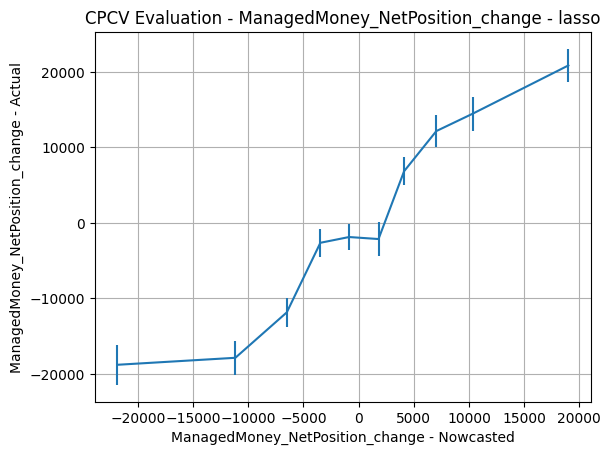

ridge: score=0.4696, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
{'alpha': 4.473429410462694e-05}


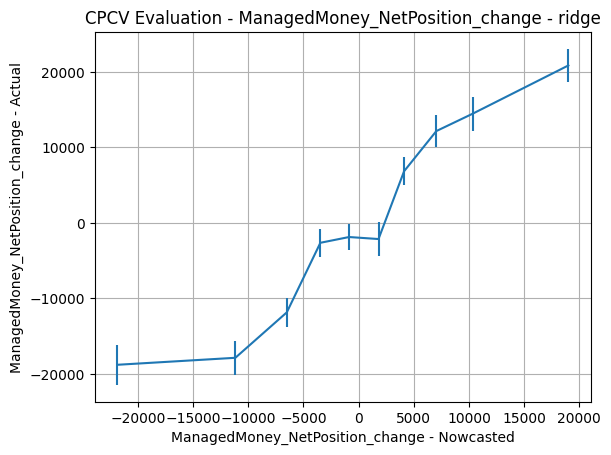

rf: score=0.5314, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 1, 'max_features': 'log2'}
{'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 1, 'max_features': 'log2'}


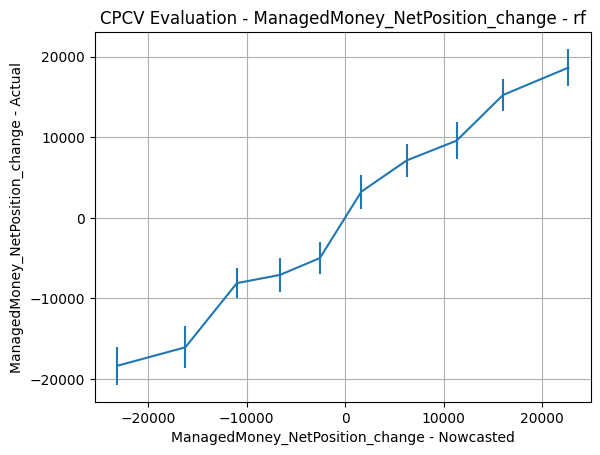

hgbm: score=0.4647, params={'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 15, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}
{'learning_rate': 0.20317617225236814, 'max_depth': 15, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}


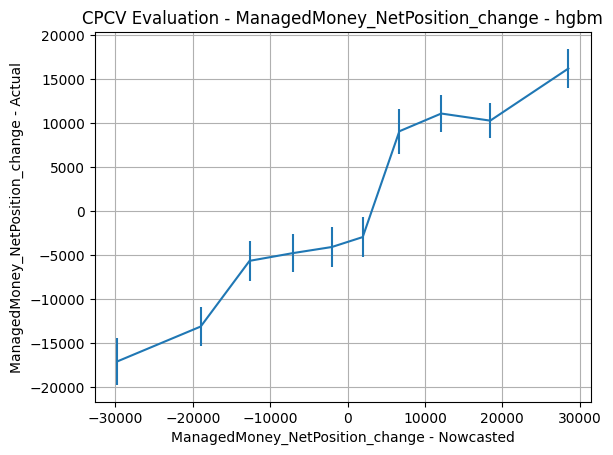

ols: score=0.4696, params={'model': 'ols'}
{}


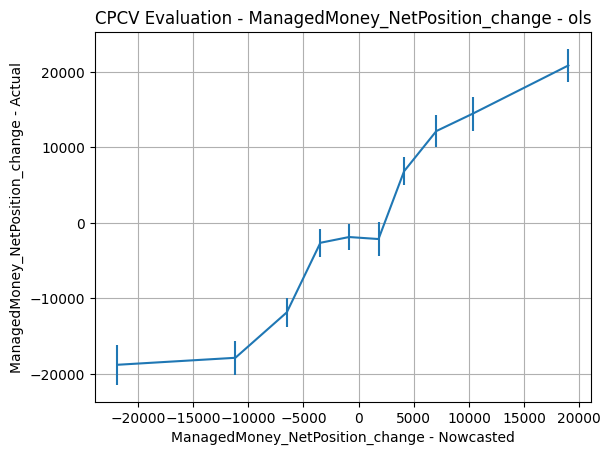

enet: score=0.3784, params={'model': 'enet', 'alpha': 8.401276915097045e-06, 'l1_ratio': 0.502306324418736, 'loss': 'huber', 'epsilon': 0.13787813405129054}
{'alpha': 8.401276915097045e-06, 'l1_ratio': 0.502306324418736, 'loss': 'huber', 'epsilon': 0.13787813405129054}


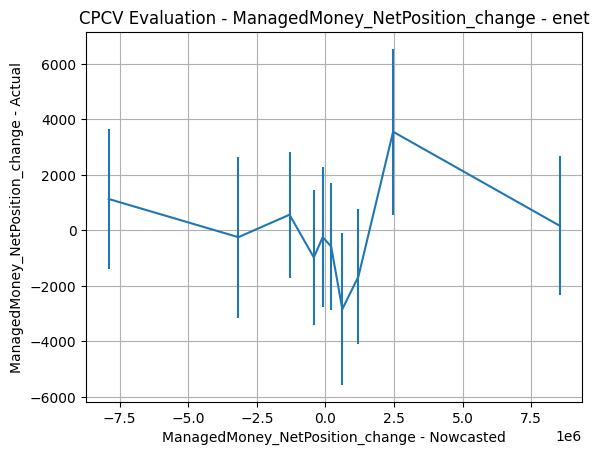

extra: score=0.5118, params={'model': 'extra', 'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}
{'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}


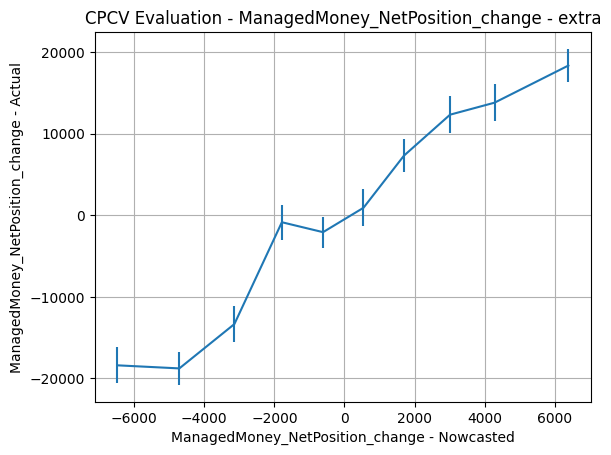

ManagedMoney_LongPosition_change
lasso: score=0.3887, params={'model': 'lasso', 'alpha': 1.261122987665929e-06}
{'alpha': 1.261122987665929e-06}


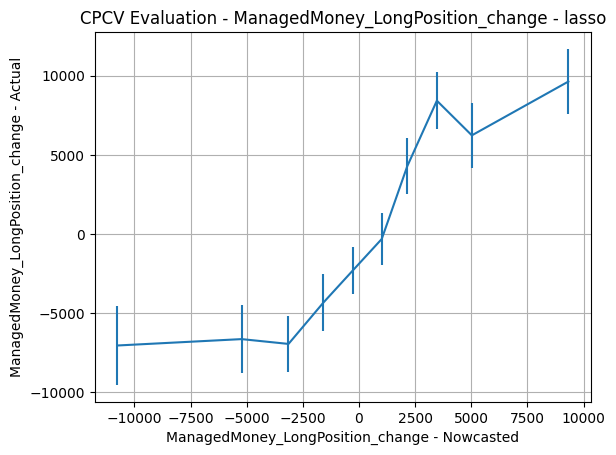

ridge: score=0.3849, params={'model': 'ridge', 'alpha': 906.6118860721004}
{'alpha': 906.6118860721004}


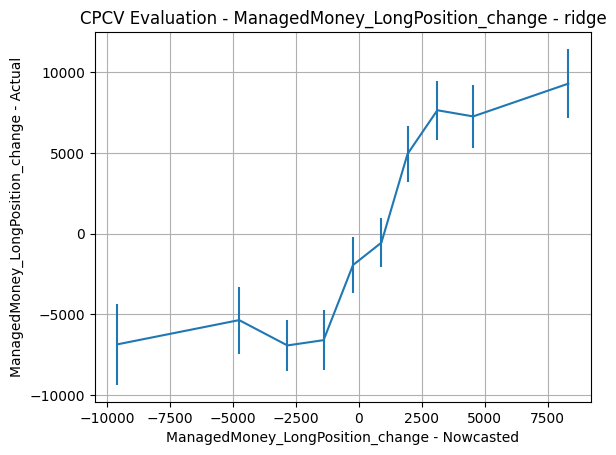

rf: score=0.4026, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 23, 'min_samples_leaf': 1, 'max_features': 'log2'}
{'n_estimators': 200, 'max_depth': 23, 'min_samples_leaf': 1, 'max_features': 'log2'}


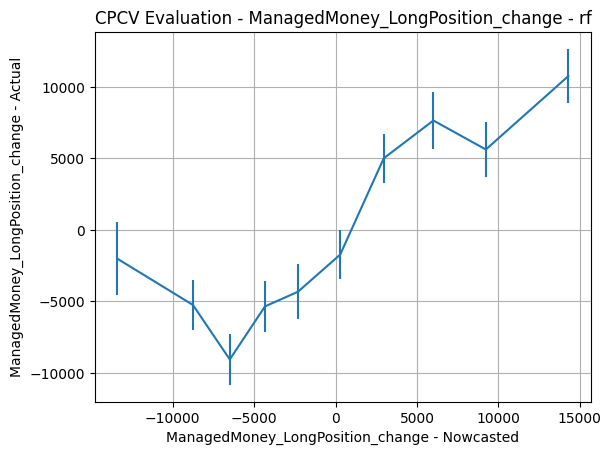

hgbm: score=0.3197, params={'model': 'hgbm', 'learning_rate': 0.14191432081077868, 'max_depth': 15, 'max_iter': 500, 'l2_regularization': 0.0014350450428439743, 'max_leaf_nodes': 179}
{'learning_rate': 0.14191432081077868, 'max_depth': 15, 'max_iter': 500, 'l2_regularization': 0.0014350450428439743, 'max_leaf_nodes': 179}


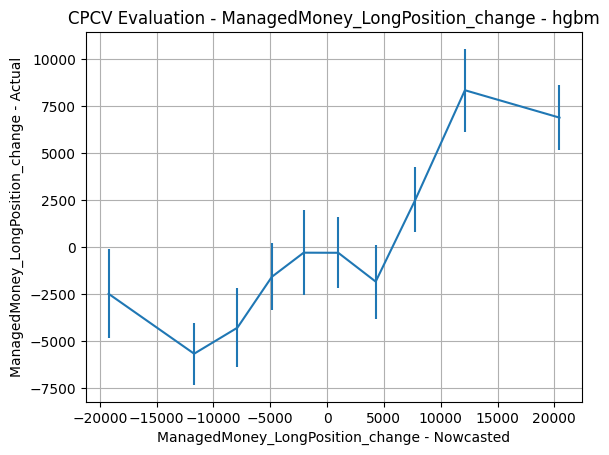

ols: score=0.3887, params={'model': 'ols'}
{}


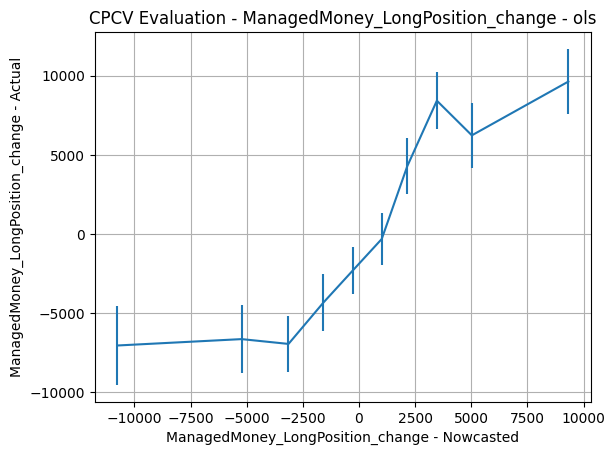

enet: score=0.3255, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


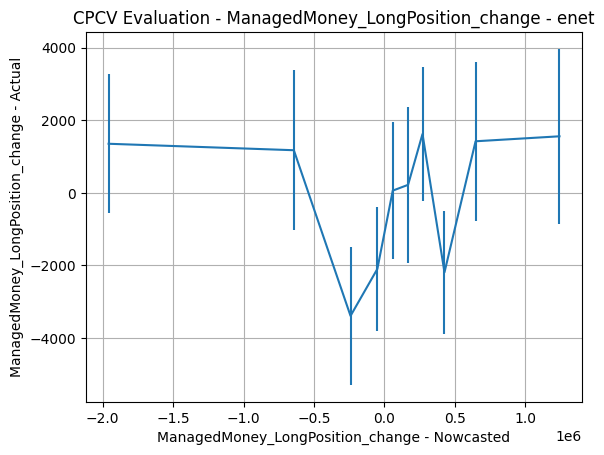

extra: score=0.4158, params={'model': 'extra', 'n_estimators': 200, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}
{'n_estimators': 200, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}


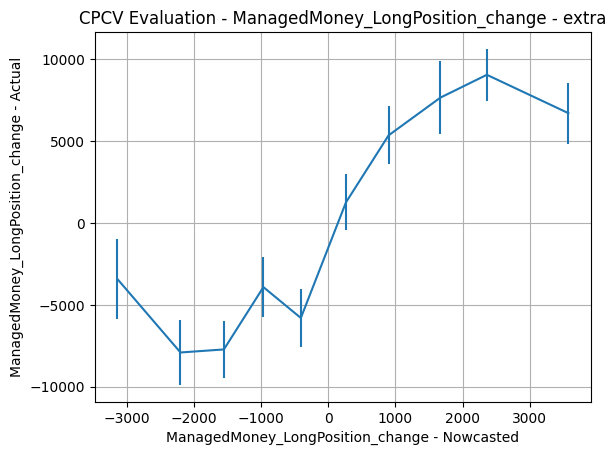

ManagedMoney_ShortPosition_change
lasso: score=0.3362, params={'model': 'lasso', 'alpha': 1.261122987665929e-06}
{'alpha': 1.261122987665929e-06}


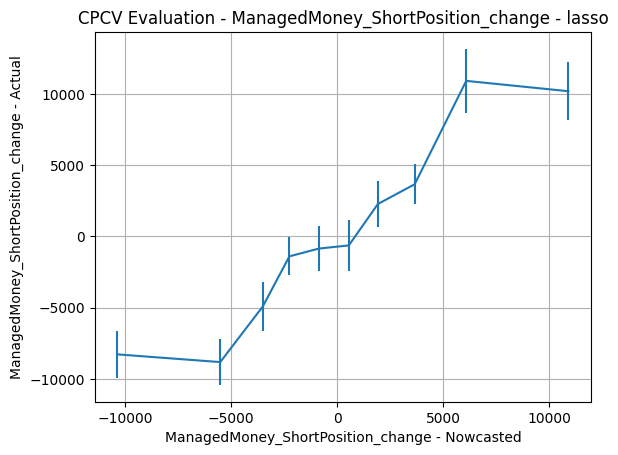

ridge: score=0.3361, params={'model': 'ridge', 'alpha': 906.6118860721004}
{'alpha': 906.6118860721004}


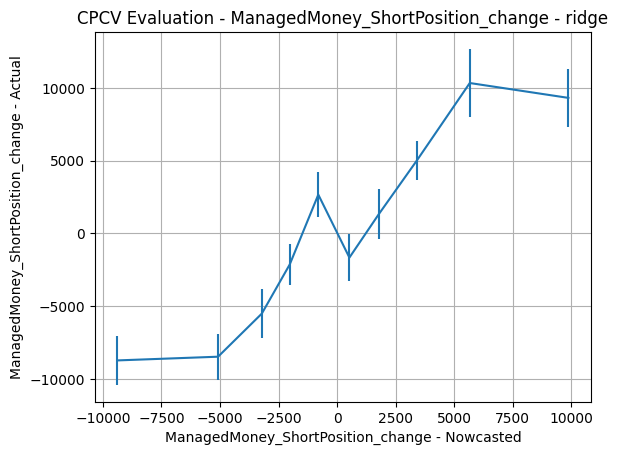

rf: score=0.3814, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'log2'}
{'n_estimators': 1000, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'log2'}


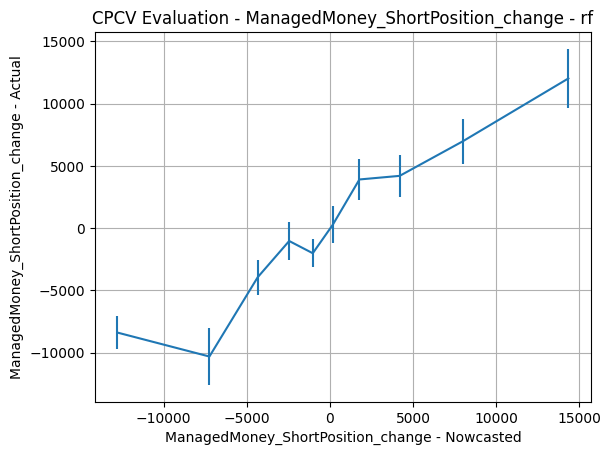

hgbm: score=0.3810, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}
{'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}


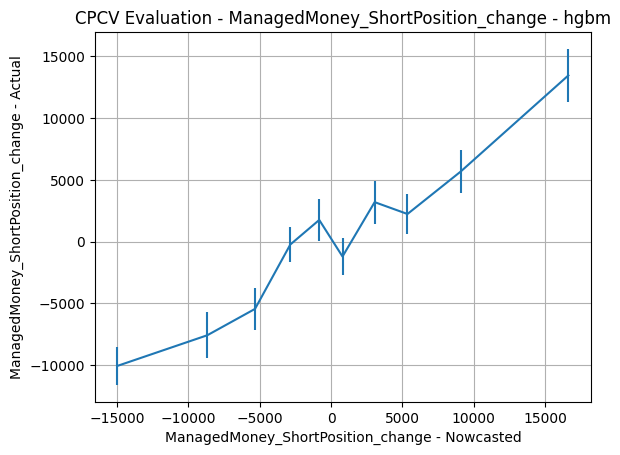

ols: score=0.3362, params={'model': 'ols'}
{}


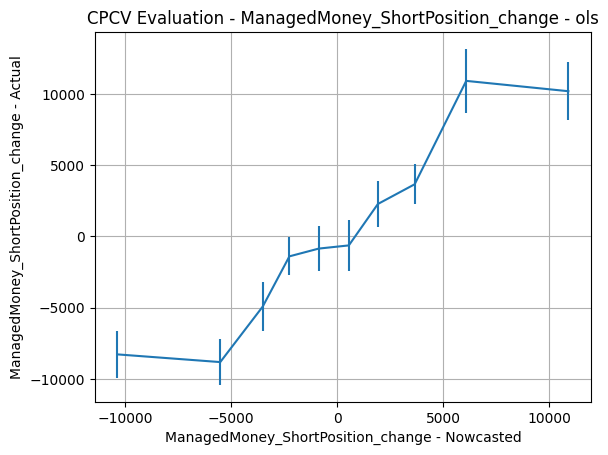

enet: score=0.2794, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


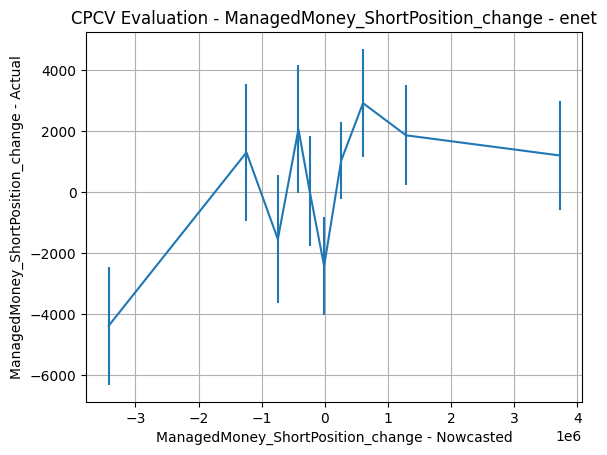

extra: score=0.3762, params={'model': 'extra', 'n_estimators': 1000, 'max_depth': 4, 'min_samples_leaf': 9, 'max_features': 'log2'}
{'n_estimators': 1000, 'max_depth': 4, 'min_samples_leaf': 9, 'max_features': 'log2'}


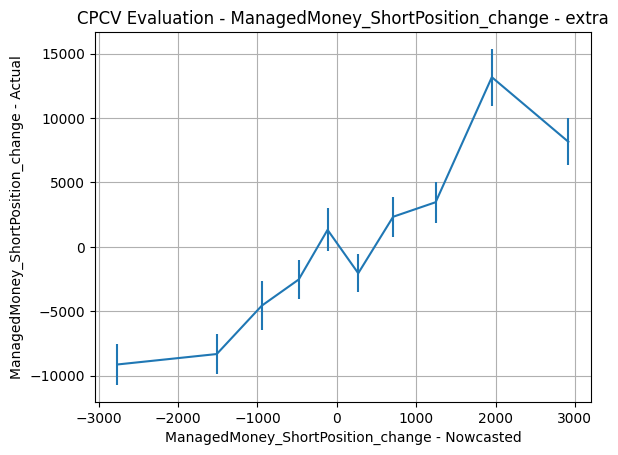

ManagedMoney_NetPosition_to_openinterest_change
lasso: score=-0.0478, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


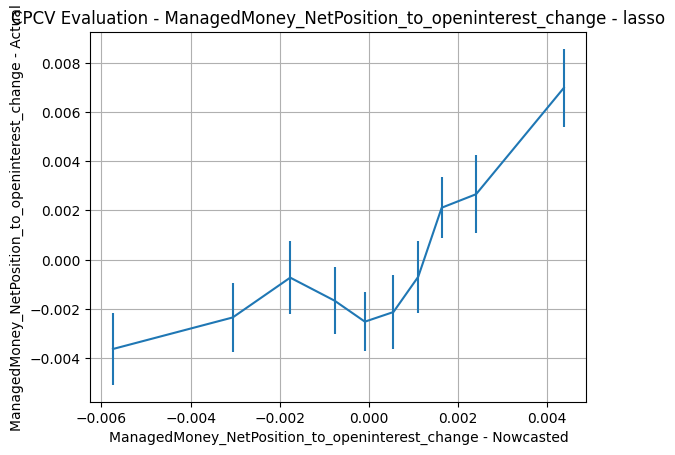

ridge: score=0.5622, params={'model': 'ridge', 'alpha': 442.5093801422389}
{'alpha': 442.5093801422389}


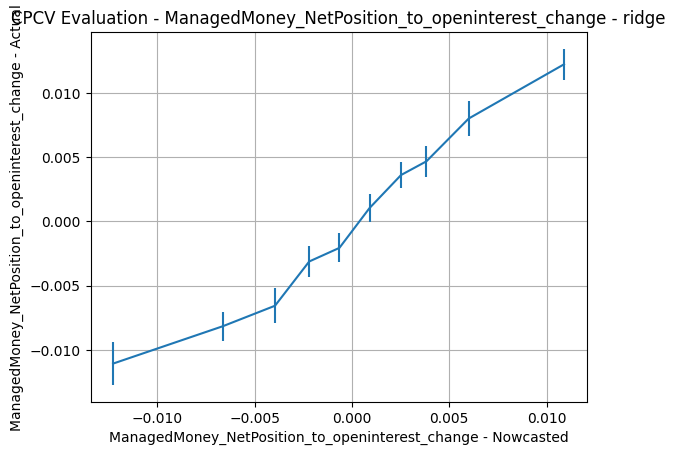

rf: score=0.6233, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'log2'}
{'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'log2'}


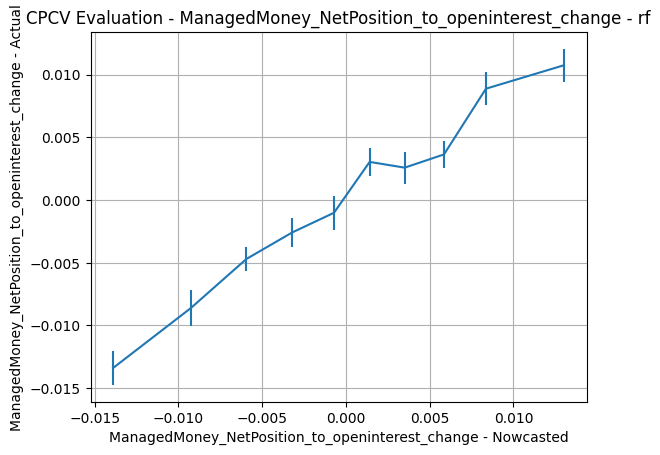

hgbm: score=0.5801, params={'model': 'hgbm', 'learning_rate': 0.20342813052984288, 'max_depth': 7, 'max_iter': 500, 'l2_regularization': 0.6109949517940931, 'max_leaf_nodes': 254}
{'learning_rate': 0.20342813052984288, 'max_depth': 7, 'max_iter': 500, 'l2_regularization': 0.6109949517940931, 'max_leaf_nodes': 254}


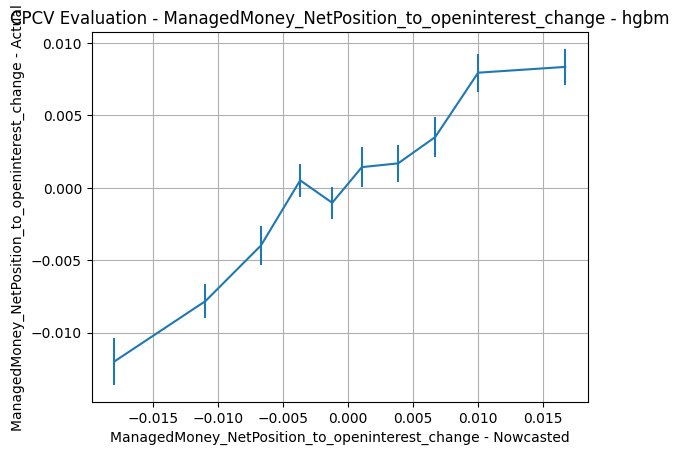

ols: score=0.5624, params={'model': 'ols'}
{}


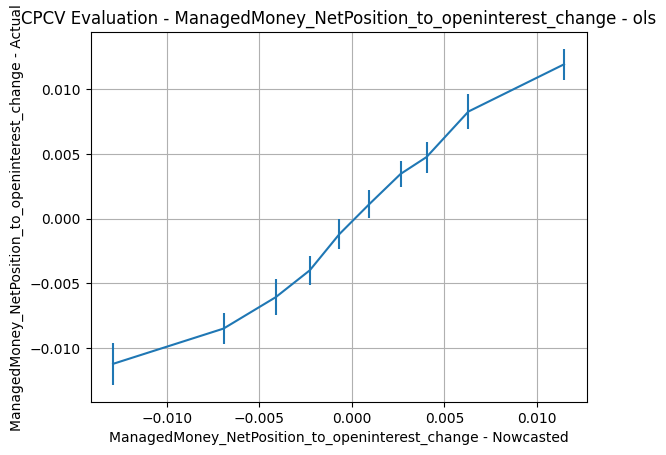

enet: score=0.3327, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


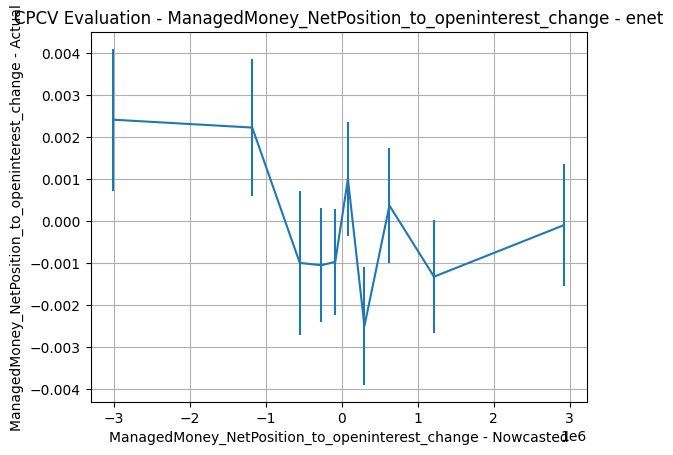

extra: score=0.6151, params={'model': 'extra', 'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 9, 'max_features': 'log2'}
{'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 9, 'max_features': 'log2'}


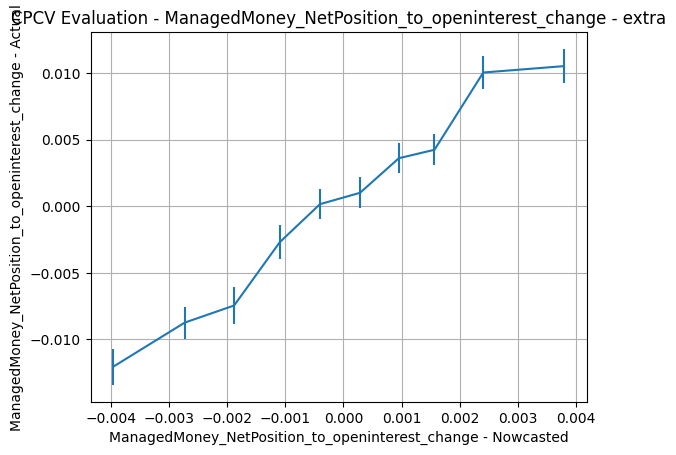

ManagedMoney_LongPosition_to_openinterest_change
lasso: score=-0.0488, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


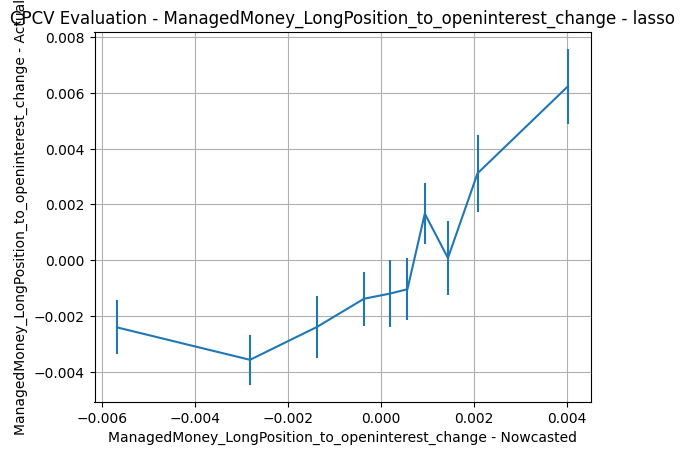

ridge: score=0.5204, params={'model': 'ridge', 'alpha': 906.6118860721004}
{'alpha': 906.6118860721004}


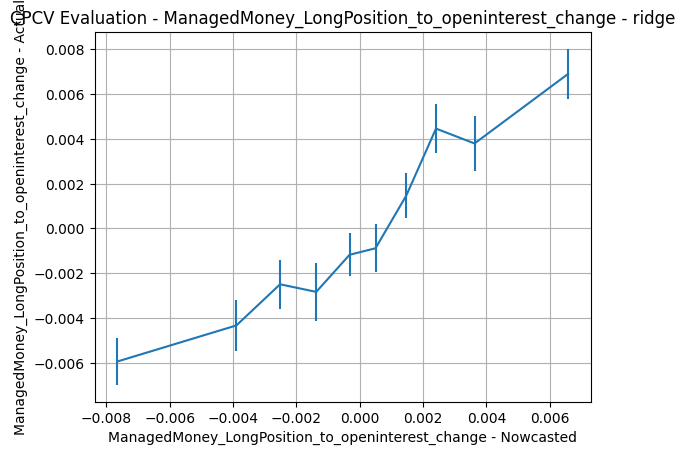

rf: score=0.5468, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
{'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}


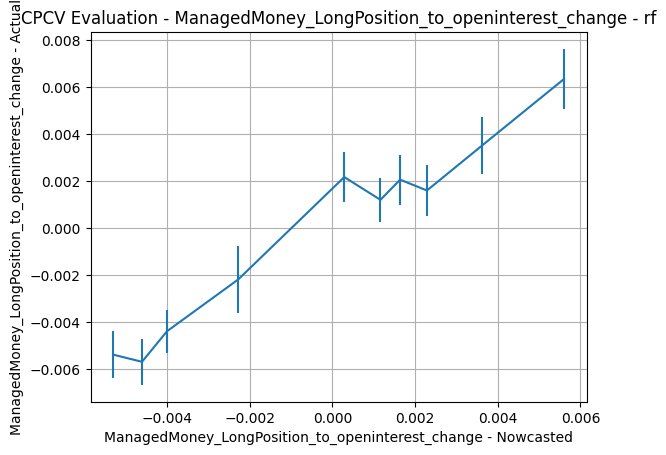

hgbm: score=0.5224, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}
{'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}


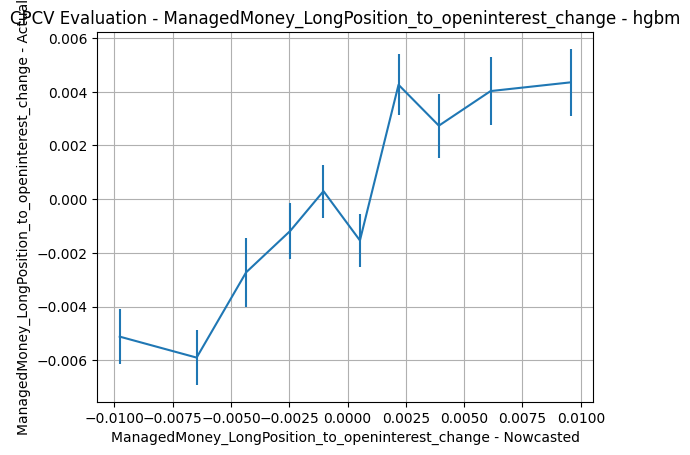

ols: score=0.5217, params={'model': 'ols'}
{}


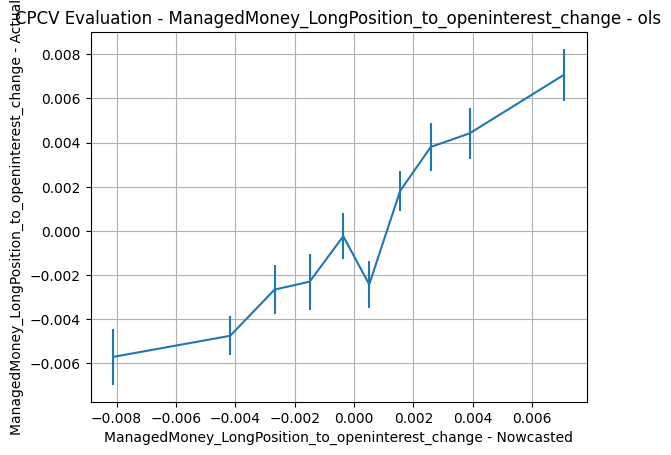

enet: score=-0.0295, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


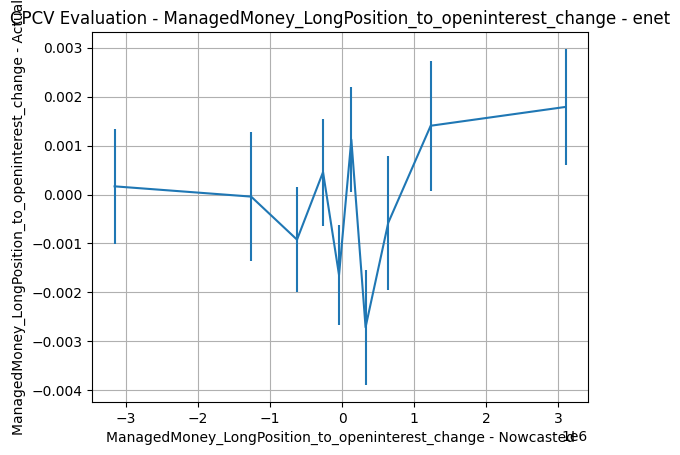

extra: score=0.5382, params={'model': 'extra', 'n_estimators': 1000, 'max_depth': 6, 'min_samples_leaf': 7, 'max_features': 'sqrt'}
{'n_estimators': 1000, 'max_depth': 6, 'min_samples_leaf': 7, 'max_features': 'sqrt'}


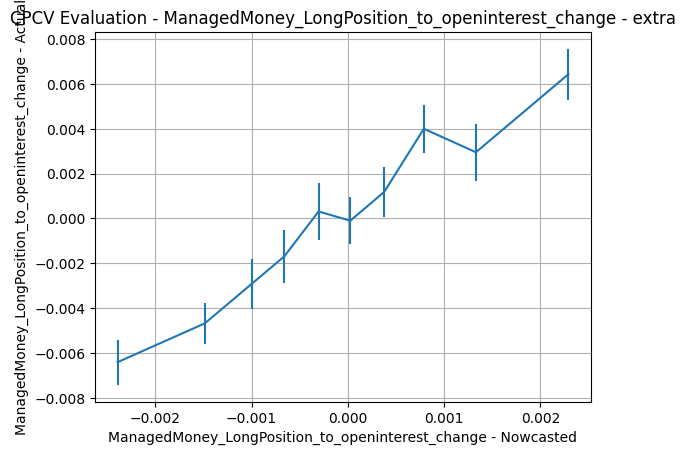

ManagedMoney_ShortPosition_to_openinterest_change
lasso: score=-0.0550, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


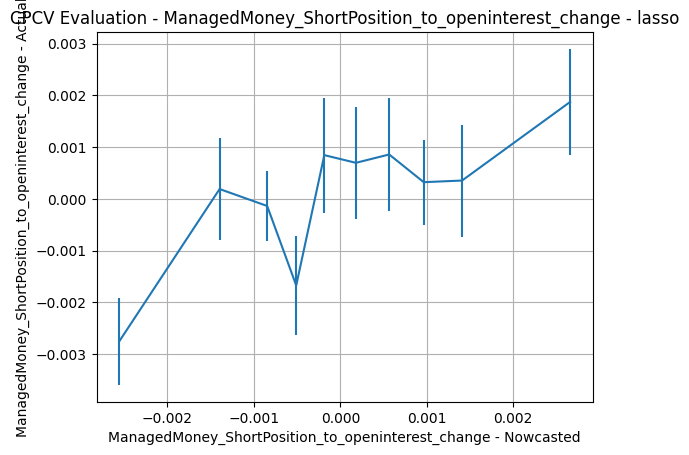

ridge: score=0.3343, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
{'alpha': 4.473429410462694e-05}


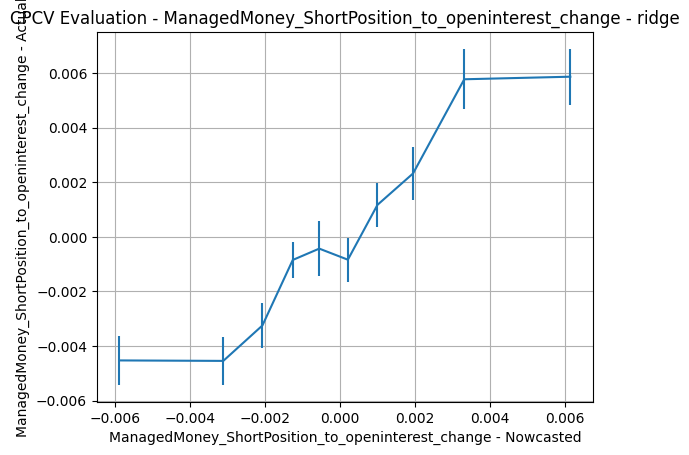

rf: score=0.4051, params={'model': 'rf', 'n_estimators': 800, 'max_depth': 17, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
{'n_estimators': 800, 'max_depth': 17, 'min_samples_leaf': 3, 'max_features': 'sqrt'}


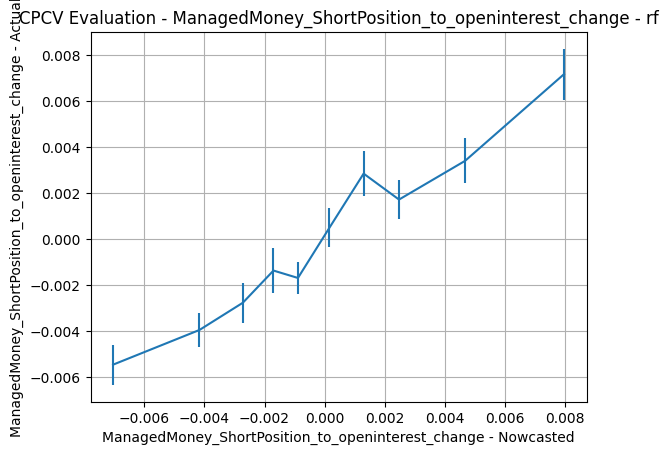

hgbm: score=0.3781, params={'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 15, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}
{'learning_rate': 0.20317617225236814, 'max_depth': 15, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}


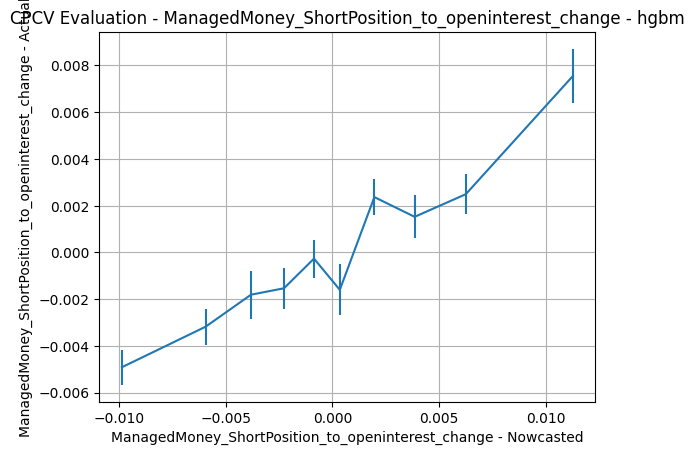

ols: score=0.3343, params={'model': 'ols'}
{}


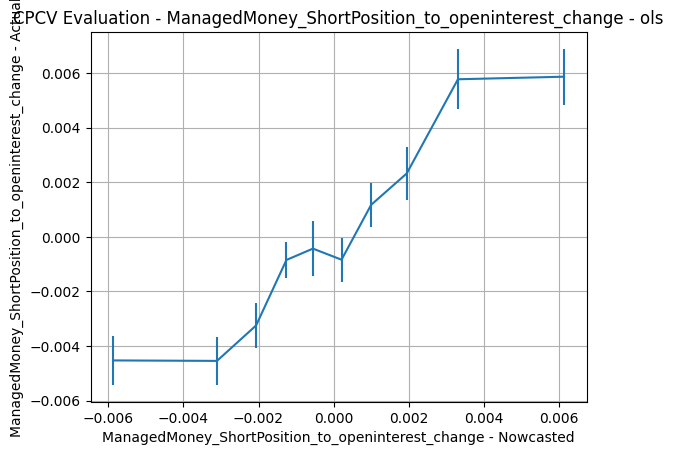

enet: score=-0.0508, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


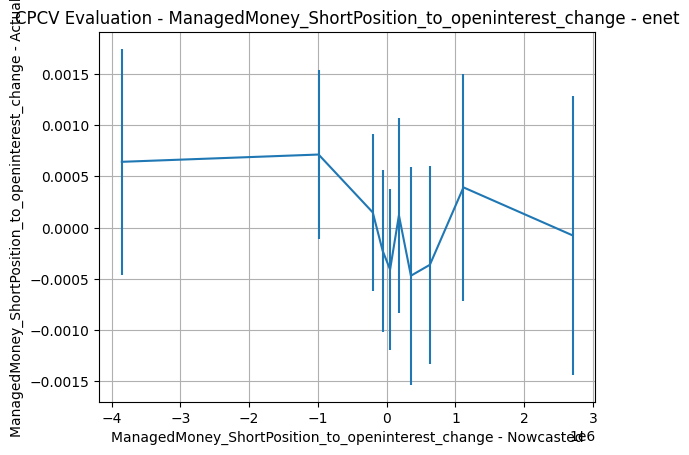

extra: score=0.3801, params={'model': 'extra', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


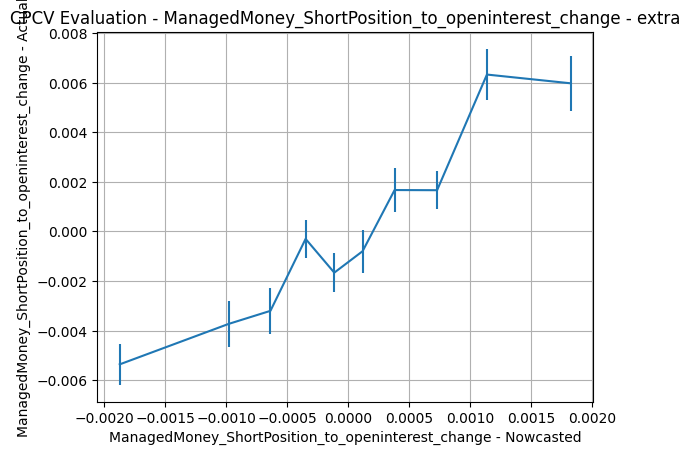

In [36]:
response_performance_map = {}
for response_name , best_model in responses_best_model.items():
    print(response_name)
    best_per_model = responses_best_per_model[response_name]
    response_performance_trail = {}
    for model_name, info in best_per_model.items():
        print(f"{model_name}: score={info['score']:.4f}, params={info['params']}")
        params = copy.deepcopy(info['params'])
        del params['model']
        print(params)
        # estimator = estimators_[model_name.lower()](**params) 

        if model_name == "enet": 
            estimator = SGDRegressor(**params)
        elif model_name == "lasso": 
            estimator = Lasso(**params)
        elif model_name == "ols": 
            estimator = LinearRegression()
        elif model_name == "ridge": 
            estimator = Ridge(**params)
        elif  model_name == "rf": 
            estimator = RandomForestRegressor(**params)
        elif model_name == "extra":
            estimator = ExtraTreesRegressor(**params)
        elif model_name == "hgbm":
            estimator = HistGradientBoostingRegressor(**params)
        

        Xy = dataset[['tradeDate']+feature_names+[response_name]].dropna()
        Xy.reset_index(drop=True, inplace= True)
        yhat = cpcv_predict( estimator ,
                             Xy[feature_names],
                             Xy[response_name],
                             cv=cv,
                                method = 'predict',
                                n_jobs=10)
        response_performance_trail[model_name] = np.corrcoef(yhat,  Xy[response_name])[0,1]
        _=plot_bin_summary_of_xy(
                    x = yhat,
                    y = Xy[response_name],
                    k= 10 )
        plt.xlabel(f'{response_name} - Nowcasted')
        plt.ylabel(f'{response_name} - Actual')
        plt.grid()
        plt.title(f'CPCV Evaluation - {response_name} - {model_name}')
        plt.show()
        plt.close()
    response_performance_map[response_name] = response_performance_trail
        
        

In [54]:
pd.DataFrame(response_performance_map).T

,lasso,ridge,rf,hgbm,ols,enet,extra
ManagedMoney_NetPosition_change,0.467621,0.467621,0.520263,0.450271,0.467621,0.010477,0.538495
ManagedMoney_LongPosition_change,0.254287,0.251989,0.271112,0.200494,0.254287,0.045272,0.286956
ManagedMoney_ShortPosition_change,0.312529,0.311456,0.359825,0.380387,0.312529,0.043575,0.364446
ManagedMoney_NetPosition_to_openinterest_change,0.203146,0.488029,0.531165,0.452170,0.487538,-0.074379,0.543702
ManagedMoney_LongPosition_to_openinterest_change,0.232465,0.354230,0.357477,0.312499,0.353916,0.049739,0.356793
ManagedMoney_ShortPosition_to_openinterest_change,0.119682,0.334253,0.405008,0.378103,0.334253,-0.005463,0.384955


In [45]:
final_selected_model_per_response = dict(pd.DataFrame(response_performance_map).T.idxmax(axis=1))

In [46]:
final_selected_model_per_response

{'ManagedMoney_NetPosition_change': 'extra',
 'ManagedMoney_LongPosition_change': 'extra',
 'ManagedMoney_ShortPosition_change': 'hgbm',
 'ManagedMoney_NetPosition_to_openinterest_change': 'extra',
 'ManagedMoney_LongPosition_to_openinterest_change': 'rf',
 'ManagedMoney_ShortPosition_to_openinterest_change': 'rf'}

In [51]:
final_selected_model_and_parameters_per_response = {}
for response_name , best_model_params in responses_best_per_model.items():
    print(response_name)
    best_model_name = final_selected_model_per_response[response_name]
    best_model_params = copy.deepcopy(best_model_params[best_model_name]['params'])
    del best_model_params['model']
    print(best_model_params)
    final_selected_model_and_parameters_per_response[response_name] = {
'model_name' : best_model_name, 
    'params': best_model_params
        
    }
    

ManagedMoney_NetPosition_change
{'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}
ManagedMoney_LongPosition_change
{'n_estimators': 200, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}
ManagedMoney_ShortPosition_change
{'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}
ManagedMoney_NetPosition_to_openinterest_change
{'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 9, 'max_features': 'log2'}
ManagedMoney_LongPosition_to_openinterest_change
{'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
ManagedMoney_ShortPosition_to_openinterest_change
{'n_estimators': 800, 'max_depth': 17, 'min_samples_leaf': 3, 'max_features': 'sqrt'}


In [52]:
final_selected_model_and_parameters_per_response

{'ManagedMoney_NetPosition_change': {'model_name': 'extra',
  'params': {'n_estimators': 200,
   'max_depth': 22,
   'min_samples_leaf': 10,
   'max_features': 'log2'}},
 'ManagedMoney_LongPosition_change': {'model_name': 'extra',
  'params': {'n_estimators': 200,
   'max_depth': 17,
   'min_samples_leaf': 10,
   'max_features': 'log2'}},
 'ManagedMoney_ShortPosition_change': {'model_name': 'hgbm',
  'params': {'learning_rate': 0.10057690178153984,
   'max_depth': 7,
   'max_iter': 100,
   'l2_regularization': 0.6842330265121569,
   'max_leaf_nodes': 121}},
 'ManagedMoney_NetPosition_to_openinterest_change': {'model_name': 'extra',
  'params': {'n_estimators': 200,
   'max_depth': 30,
   'min_samples_leaf': 9,
   'max_features': 'log2'}},
 'ManagedMoney_LongPosition_to_openinterest_change': {'model_name': 'rf',
  'params': {'n_estimators': 200,
   'max_depth': 3,
   'min_samples_leaf': 1,
   'max_features': 'log2'}},
 'ManagedMoney_ShortPosition_to_openinterest_change': {'model_name': 

In [53]:
import json
with open("wti_cot_mm_nowcast_selected_model_by_response.json", "w") as f:
    json.dump(final_selected_model_and_parameters_per_response, f)